In [1]:
%run 00_analysis_config.ipynb

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)


Welcome to JupyROOT 6.24/06

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [2]:
# modules in this directory
import visualization, util, event, cutflow, detector
importlib.reload(event)
importlib.reload(visualization)
importlib.reload(util)
importlib.reload(detector)
import visualization as vis
reload(vis)

# Figure save path prefix
savefig.fig_prefix = "plots/vertexllp55_"    # It's good to keep figures in a separate folder. Can also be set to None.
savefig.SAVE = True         # Use this flag to turn the figure saving on or off, so that you don't need to modify all notebook to save figure.

In [3]:
filename_pre = f"/project/def-mdiamond/tomren/mathusla/data/LLP/"
filenames = [f"{filename_pre}/LLP_test_bb_55/20230725/200928/stat_vertexmod.root"]
filelables=["LLP_bb55_test",]
# filenames = [f"{DATA_DIR}//XtoMuMu_P10GeV_manual/20230526/170751/stat_vertex_original.root",f"{DATA_DIR}//XtoMuMu_P10GeV_manual/20230526/170751/stat_vertexmod.root"]

In [4]:
# filename_raw = "scripts/filereader_muon_M4000_P40000_N60000_fullvolume.txt"
# # filename_raw = "scripts/file_reader_example_particle_parameter.txt"
# vertex_raw = read_raw_vertex(filename_raw)
# vertex_raw_eta = np.arctanh(vertex_raw[:,3]/np.linalg.norm(vertex_raw[:,3:6],axis=1))
# vertex_raw_phi = np.arctan(-vertex_raw[:,4]/vertex_raw[:,5])

In [5]:
# Load the raw file
filereader_input_filename = "scripts/LLP_test_bb_55.txt"
vertex_raw, weights_raw = read_raw_vertex_weight(filereader_input_filename)
vertex_raw_ntracks = read_raw_vertex_ntracks(filereader_input_filename)
vertex_raw_eta = np.arctanh(vertex_raw[:,3]/np.linalg.norm(vertex_raw[:,3:6],axis=1))
vertex_raw_phi = np.arctan(-vertex_raw[:,4]/vertex_raw[:,5])
weights_total = weights_raw[:,0]

findfont: Font family ['san-serif'] not found. Falling back to DejaVu Sans.


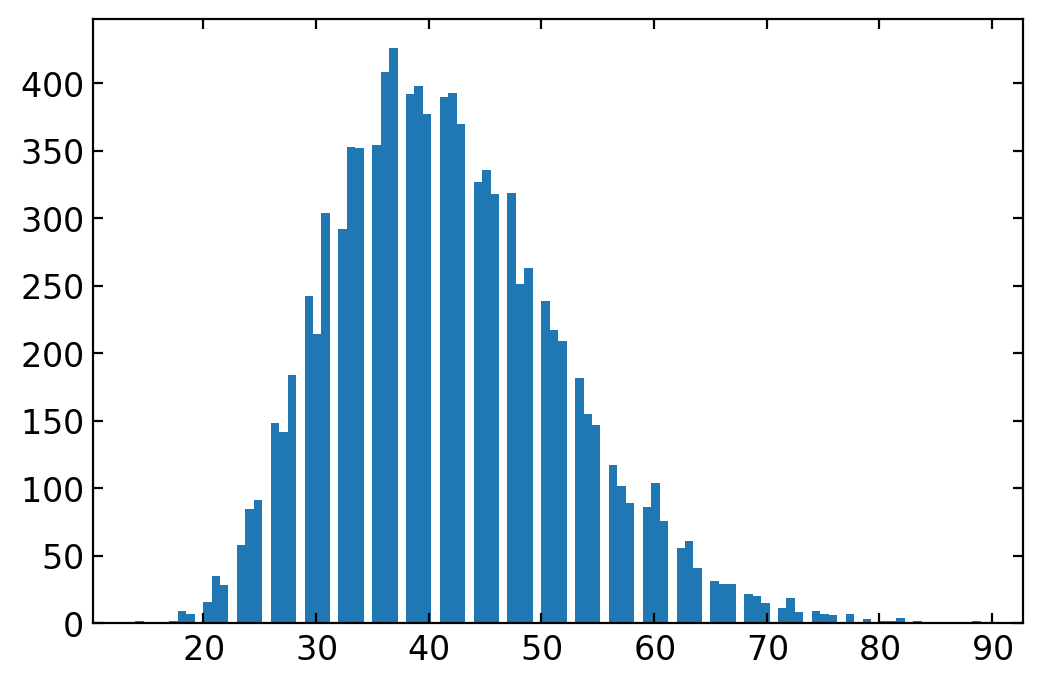

In [6]:
# This gives an idea of how may particle Geant4 is generating
hist(vertex_raw_ntracks);

In [7]:
ifile=0

filename_recon = filenames[ifile]
n_original=10_000;


# filename_recon = os.path.dirname(filename)+"/stat_seedmod.root"
tfile = root.TFile.Open(filename_recon)
tree_name = tfile.GetListOfKeys()[0].GetName()
Tree = tfile.Get(tree_name)
ev = event.Event(filename_recon, 0, tree_name=tree_name)

nevents = int(Tree.GetEntries())
branch_list = [Tree.GetListOfBranches()[i].GetName() for i in range(len(Tree.GetListOfBranches()))]
print("Number of events",nevents)
print(branch_list)

# # Draw 20 events
# ev = event.Event(filename_recon, 0, tree_name=tree_name)
# fig,axs=plt.subplots(2,2,figsize=(12,9))
# for i in range(20):
#     ev.EventNumber=i
#     # Plot truth
#     fig = vis.plot_truth(ev,fig=fig, disp_det_view=False, disp_vertex=False, disp_first_hit=False,make_legend=False);
# fig = vis.plot_truth(ev,fig=fig, disp_det_view=True, disp_vertex=False, disp_first_hit=False,make_legend=False);

# Load data
data = get_km_alltracks(filename_recon, nevents=-1)
print(data.keys())

Number of events 9998
['NumHits', 'Hit_energy', 'Hit_time', 'Hit_detId', 'Hit_particlePdgId', 'Hit_G4TrackId', 'Hit_G4ParentTrackId', 'Hit_x', 'Hit_y', 'Hit_z', 'Hit_particleEnergy', 'Hit_particlePx', 'Hit_particlePy', 'Hit_particlePz', 'Digi_numHits', 'Digi_time', 'Digi_x', 'Digi_y', 'Digi_z', 'Digi_energy', 'Digi_px', 'Digi_py', 'Digi_pz', 'Digi_particle_energy', 'Digi_pdg_id', 'Digi_track_id', 'Digi_layer_id', 'Digi_seed', 'GenParticle_index', 'GenParticle_G4index', 'GenParticle_pdgid', 'GenParticle_time', 'GenParticle_x', 'GenParticle_y', 'GenParticle_z', 'GenParticle_energy', 'GenParticle_px', 'GenParticle_py', 'GenParticle_pz', 'GenParticle_mass', 'EXTRA_12', 'EXTRA_13', 'EXTRA_14', 'EXTRA_15', 'Vertex_k_m_t', 'Vertex_k_m_x', 'Vertex_k_m_y', 'Vertex_k_m_z', 'Vertex_k_m_cov_t_x', 'Vertex_k_m_cov_t_y', 'Vertex_k_m_cov_t_z', 'Vertex_k_m_cov_x_y', 'Vertex_k_m_cov_x_z', 'Vertex_k_m_cov_y_z', 'Vertex_k_m_ErrorT', 'Vertex_k_m_ErrorX', 'Vertex_k_m_ErrorY', 'Vertex_k_m_ErrorZ', 'Vertex_k_

  0%|          | 20/9998 [00:01<13:02, 12.75it/s] /tmp/ipykernel_20258/1927932766.py:219: RuntimeWarning: invalid value encountered in sqrt
  results_fit["tracks_recon_error"].append(np.sqrt(tracks_recon_error))
100%|██████████| 9998/9998 [10:48<00:00, 15.42it/s]


dict_keys(['Entry', 'ndigi', 'Digi_track_id', 'mask_recon_success_track', 'mask_recon_success_vertex', 'mask_reconstructible_vertex', 'mask_reconstructible2_vertex', 'tracks_truth', 'tracks_truth_n', 'tracks_truth_nlayer', 'tracks_truth_pdgids', 'tracks_recon', 'tracks_recon_n', 'tracks_recon_error', 'tracks_ndigi', 'tracks_ndigi_false', 'tracks_purity', 'tracks_pdgids', 'tracks_chi2', 'vertices_truth', 'vertices_ntrack', 'vertices_ntrack_truth', 'vertices_recon', 'vertices_recon_n', 'vertices_recon_error', 'vertices_recon_cov', 'vertices_chi2'])


In [8]:
# tfile = root.TFile.Open(filename_recon)
# tree_name = tfile.GetListOfKeys()[0].GetName()
# Tree = tfile.Get(tree_name)

# for i in range(20):
#     Tree.GetEntry(i)
#     print(i, Tree.GenParticle_y[1]*0.1, -Tree.GenParticle_z[1]*0.1+85.47*100, Tree.GenParticle_x[1]*0.1)

In [9]:
# -------
# Cuts
mask_vertex_recon = data["vertices_recon_n"]>=1
mask_track_recon = data["mask_recon_success_track"]
mask = mask_vertex_recon
# mask_reconstructible = np.array([(len(i)>1 and min(i)>=4) for i in data["tracks_truth_nlayer"]])
mask_reconstructible = np.array(data["mask_reconstructible_vertex"])  # Reconstructible defined only on direct decay products 
mask_reconstructible2 = np.array(data["mask_reconstructible2_vertex"]) # Reconstructible defined include secondary particles of decay products
k_reconstructible = sum(mask_reconstructible)/n_original
print("Total events:",len(mask_reconstructible),". Total simulated:",n_original)
print("k_reconstructible: ",k_reconstructible)

# -----------
# Variables

Entry = np.array(util.appcut(data["Entry"], mask))
Entry_failed = np.array(util.appcut(data["Entry"], ~mask))

# Truth----------------------------------------
Vertices_truth_xyz=[]
Vertices_truth=[]
Vertices_truth_direction_unit=[]
Vertices_ntracks_truth_all=[]
for i in tqdm(Entry):
    Tree.GetEntry(i)
    g4ids = util.c2list(Tree.Hit_G4ParentTrackId)
    vertex=[Tree.GenParticle_x[1]/10, Tree.GenParticle_y[1]/10, Tree.GenParticle_z[1]/10]
    Vertices_truth_xyz.append([Tree.GenParticle_x[1]/10, Tree.GenParticle_y[1]/10, Tree.GenParticle_z[1]/10])
    Vertices_truth.append([vertex[1], -vertex[2]+85.47*100, vertex[0], 0])
    Vertices_truth_direction_unit.append(Vertices_truth[-1][:3]/np.linalg.norm(Vertices_truth[-1][:3]))
    
    # Get number of tracks
    ids =np.array(util.c2list(Tree.Digi_track_id))
    ys = np.array(util.c2list(Tree.Digi_y))
    n_reconstructible2=0
    for g4id in np.unique(ids):
        if len(np.unique(ys[ids==g4id]))>=4:
            n_reconstructible2+=1  
    Vertices_ntracks_truth_all.append(n_reconstructible2)    

Vertices_truth=np.array(Vertices_truth)
Vertices_truth_xyz=np.array(Vertices_truth_xyz)
Vertices_truth_direction_unit=np.array(Vertices_truth_direction_unit)
Vertices_truth_eta = np.arctanh(Vertices_truth[:,2]/np.linalg.norm(Vertices_truth[:,:3],axis=1))
Vertices_truth_phi = np.arctan(Vertices_truth[:,0]/Vertices_truth[:,1])


# Recon -----------------------------------
# Pick the vertices that is closest to the truth
Vertices=[]
Vertices_err=[]
Vertices_chi2=[]
Vertices_ntracks=[]
Vertices_ntracks_truth=[]
Vertices_n = []
Vertex_track_purity=[]
Vertex_track_purity_std=[]
Tracks_purity = []
for i, entry  in  enumerate(Entry):
    vertices = data["vertices_recon"][entry]
    Vertices_n.append(len(vertices))
    vertex_truth = Vertices_truth[i]
    recon_truth_dist = []
    for vrecon in vertices:
        recon_truth_dist.append(np.linalg.norm((np.array(vrecon) - vertex_truth)[:3]))
    vertex_ind = np.argmin(recon_truth_dist)
    
    # Track purity
    ev.Tree.GetEntry(entry)
    track_km_g4inds = util.unzip(util.c2list(ev.Tree.Track_k_m_ids))
    track_km_g4ind_frequent = np.array([util.most_frequent(trackinds) for trackinds in track_km_g4inds])
    vertex_track_inds=util.unzip(np.array(util.c2list(ev.Tree.Vertex_k_m_trackIndices),dtype=int))[vertex_ind]
    vertex_track_purities = []   
    for itrack in vertex_track_inds:
        vertex_track_purities.append(sum(track_km_g4inds[itrack]==track_km_g4ind_frequent[itrack])/len(track_km_g4inds[itrack]))    
    Tracks_purity.append(vertex_track_purities)
    Vertex_track_purity.append(np.mean(vertex_track_purities))
    Vertex_track_purity_std.append(np.std(vertex_track_purities))    
    
    
    Vertices.append(vertices[vertex_ind])
    Vertices_err.append(data["vertices_recon_error"][entry][vertex_ind])
    Vertices_chi2.append(data["vertices_chi2"][entry][vertex_ind])
    Vertices_ntracks_truth.append(data["vertices_ntrack_truth"][entry])
    Vertices_ntracks.append(data["vertices_ntrack"][entry][vertex_ind])
Vertices_chi2=np.array(Vertices_chi2)    
Vertices_ntracks=np.array(Vertices_ntracks)
Vertices_n=np.array(Vertices_n)
Vertex_track_purity=np.array(Vertex_track_purity)
Vertex_track_purity_std=np.array(Vertex_track_purity_std)
Tracks_purity_flat = util.Utils.flatten1d(Tracks_purity)

    
    
# Residual: --------------------------------------------
# each entry is [dx, dy, dz, dt]
residual = (Vertices - Vertices_truth)
residual_r = np.linalg.norm(residual[:,:3],axis=1) # Total position residual
residual_axial  = np.array([np.dot(residual[i][:3],Vertices_truth_direction_unit[i]) for i in range(len(residual))])    
residual_radial = np.array([np.linalg.norm(np.cross(residual[i][:3],Vertices_truth_direction_unit[i])) for i in range(len(residual))])


mask_inds = np.flatnonzero(mask)
# We need a map from the raw info to the simulated.
# 'all_entry' provides the index of the simulated events in the raw file.
all_entry = []
for i in range(nevents):
    Tree.GetEntry(i)
    all_entry.append(int(Tree.GenParticle_index[0]))
    
weights = weights_raw[:,0][all_entry]

Total events: 9998 . Total simulated: 10000
k_reconstructible:  0.6583


100%|██████████| 7943/7943 [01:50<00:00, 71.87it/s] 


In [10]:
# for i in range(20):
#     ev.Tree.GetEntry(i)
#     print(np.unique(util.c2list(ev.Tree.Digi_track_id)))

findfont: Font family ['san-serif'] not found. Falling back to DejaVu Sans.


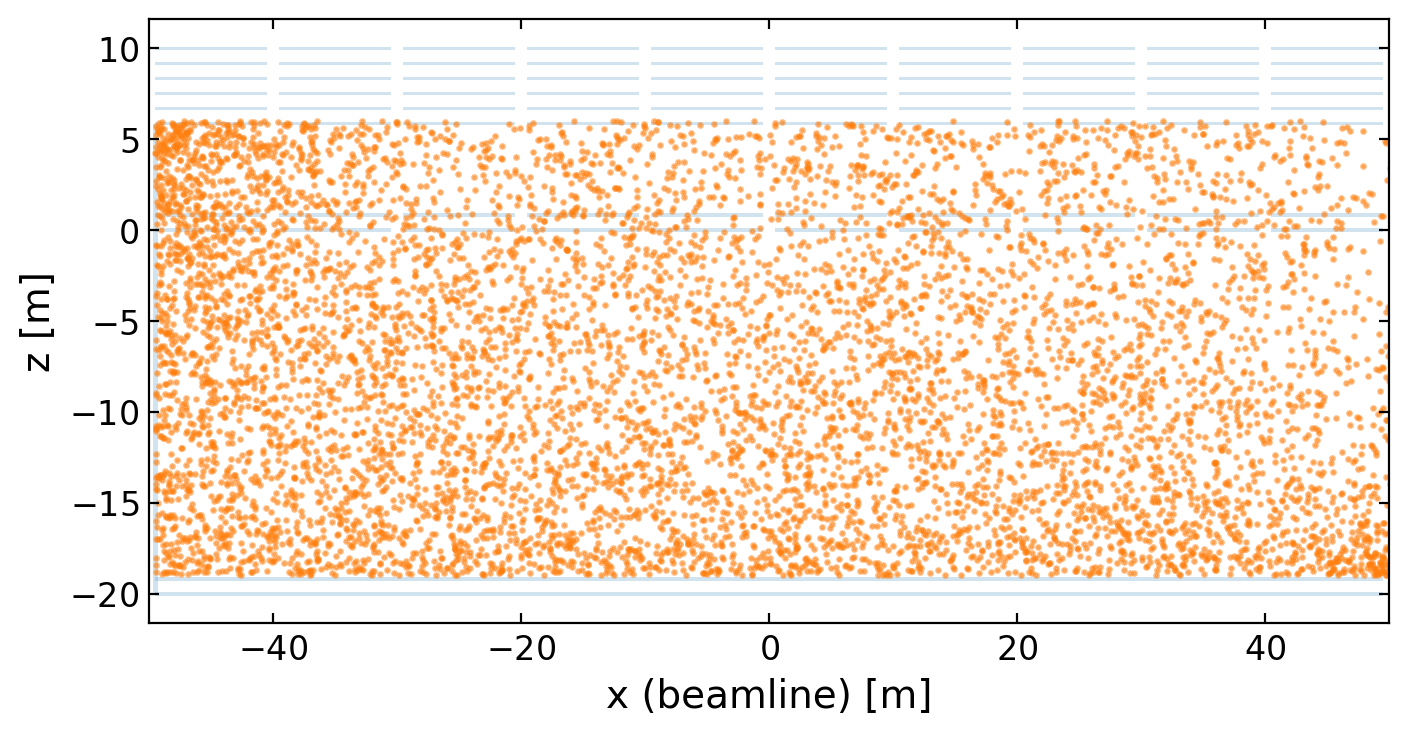

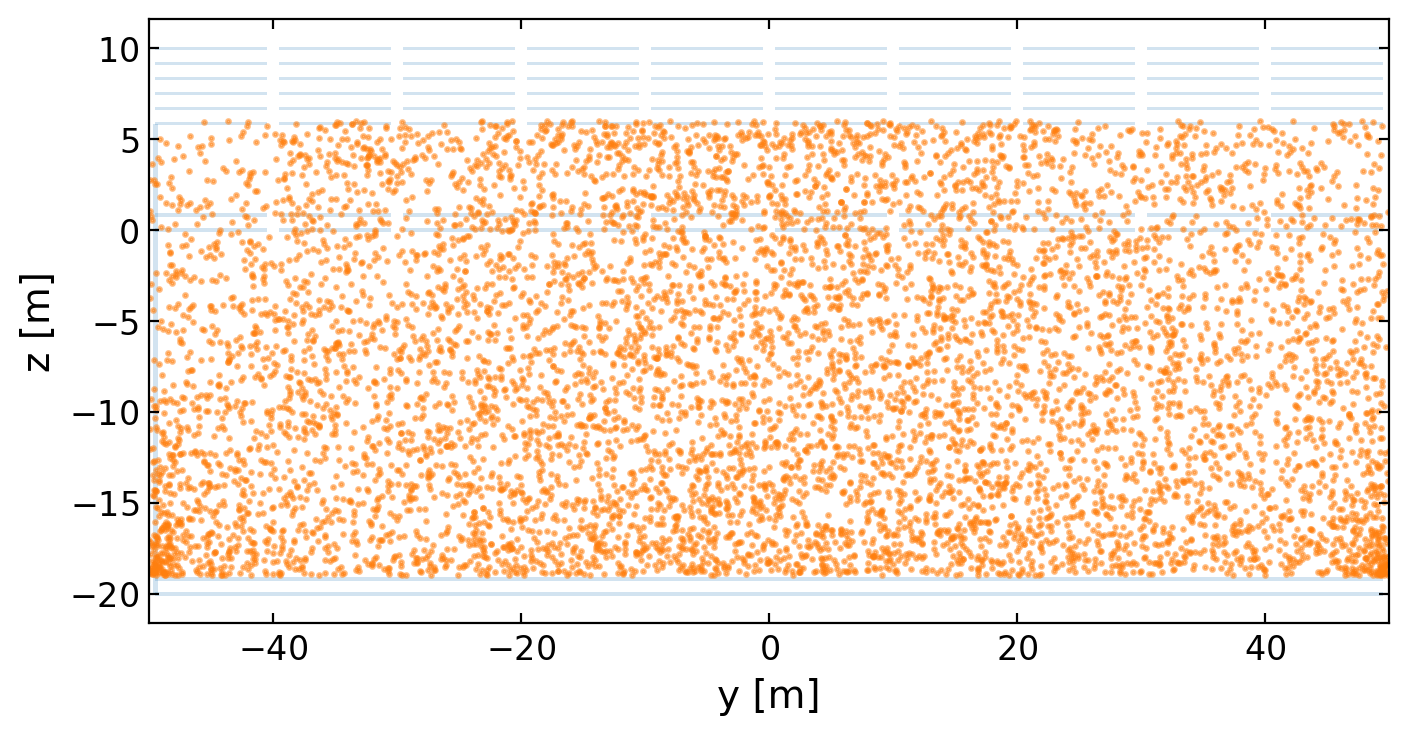

In [11]:
fig,ax=subplots(figsize=(8,4))
vis.drawdet_xz(alpha=0.2)
nplot=8000
scatter(Vertices_truth_xyz[:nplot,0]/100-70-49.5,-Vertices_truth_xyz[:nplot,2]/100,s=2,alpha=0.5,color="C1")
xlim(-50,50)
xlabel("x (beamline) [m]")
ylabel("z [m]")
savefig(f"{filelables[ifile]}_vertex_dist_xz")
show()

fig,ax=subplots(figsize=(8,4))
vis.drawdet_xz(alpha=0.2)
scatter(Vertices_truth_xyz[:nplot,1]/100,-Vertices_truth_xyz[:nplot,2]/100,s=2,alpha=0.5,color="C1")
xlim(-50,50)
xlabel("y [m]")
ylabel("z [m]")
savefig(f"{filelables[ifile]}_vertex_dist_yz")
show()

Efficiency (2m cut): 0.63
Efficiency (4m cut): 0.69


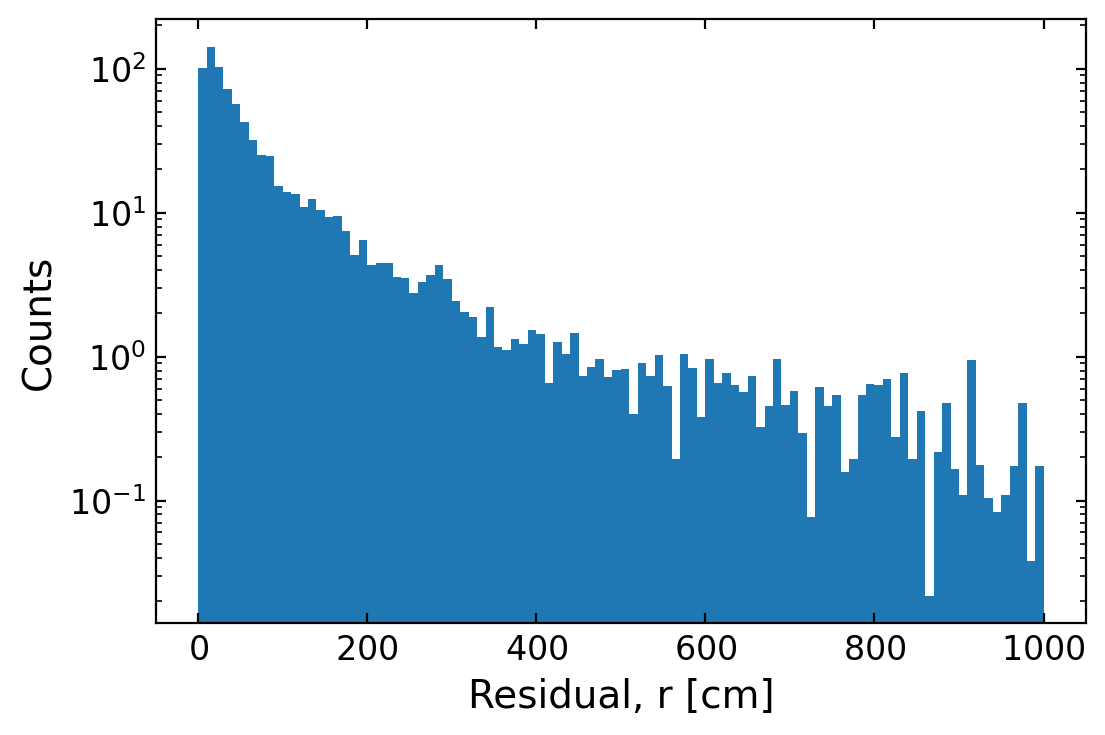

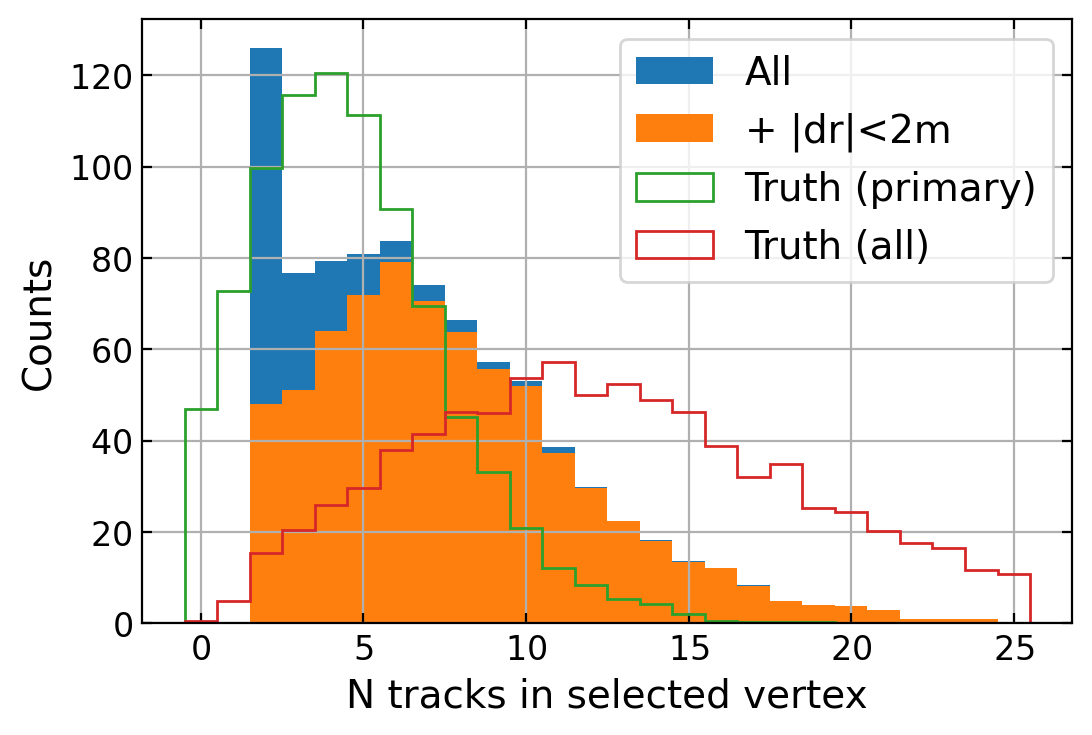

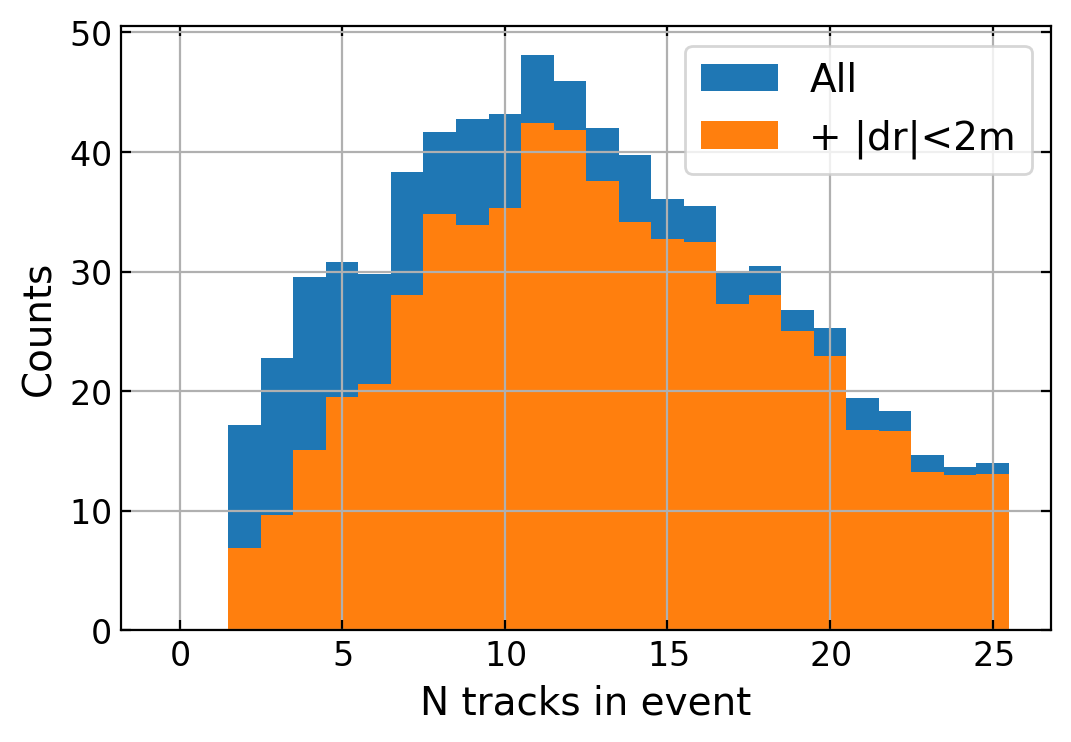

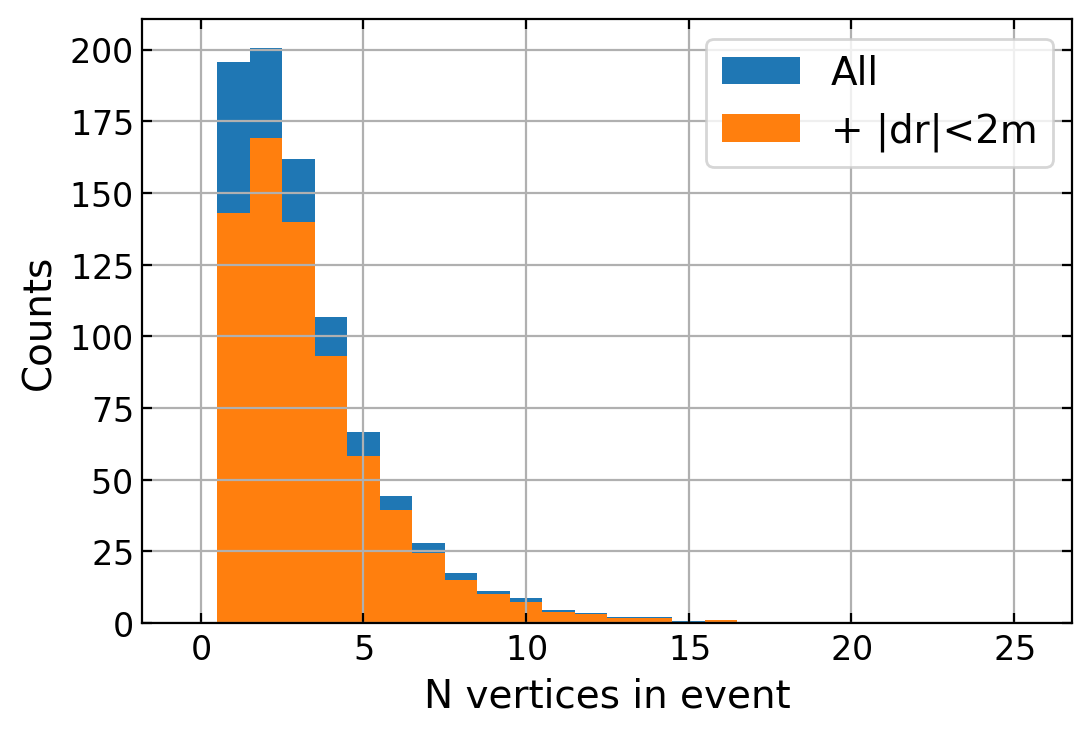

In [12]:
mask_residual = residual_r<200
n,ibins,p = hist(residual_r,log=1,range=(0,1e3), weights = weights[mask]);
efficiency = sum(mask_residual)/n_original
efficiency2 = sum(residual_r<400)/n_original
print("Efficiency (2m cut):", f"{efficiency:.2f}")
print("Efficiency (4m cut):", f"{efficiency2:.2f}")
xlabel("Residual, r [cm]")
ylabel("Counts")
savefig(f"{filelables[ifile]}_vertex_dr")
show()

bins=np.linspace(-0.5,25.5,27)
hist(Vertices_ntracks, bins=bins, weights = weights[mask],label="All");
hist(Vertices_ntracks[mask_residual], bins=bins, weights = weights[mask][mask_residual],label="+ |dr|<2m");
hist(Vertices_ntracks_truth, bins=bins, weights = weights[mask],label="Truth (primary)", histtype="step");
hist(Vertices_ntracks_truth_all, bins=bins, weights = weights[mask],label="Truth (all)", histtype="step");
grid()
xlabel("N tracks in selected vertex")
ylabel("Counts")
legend()
savefig(f"{filelables[ifile]}_vertex_ntracks")
show()

bins=np.linspace(-0.5,25.5,27)
hist(data["tracks_recon_n"][mask_vertex_recon], bins=bins, weights = weights[mask],label="All");
hist(data["tracks_recon_n"][mask_vertex_recon][mask_residual], bins=bins, weights = weights[mask][mask_residual],label="+ |dr|<2m");
grid()
xlabel("N tracks in event")
ylabel("Counts")
legend()
savefig(f"{filelables[ifile]}_event_ntracks")
show()

bins=np.linspace(-0.5,25.5,27)
hist(Vertices_n, bins=bins, weights = weights[mask],label="All");
hist(Vertices_n[mask_residual], bins=bins, weights = weights[mask][mask_residual],label="+ |dr|<2m");
grid()
xlabel("N vertices in event")
ylabel("Counts")
legend()
savefig(f"{filelables[ifile]}_event_nvertex")
show()

In [13]:
# hist(weights_total,range=(0,0.3),density=0,histtype="step",label="all events");
# hist(weights_total[all_entry],range=(0,0.3),density=0,histtype="step",label="recorded");
# axvline(mean(weights_total))

In [14]:
n_original_weighted = sum(weights_total)
n_reconstructible_weighted = sum(weights_total[all_entry][mask_reconstructible])
k_reconstructible_weighted = n_reconstructible_weighted/n_original_weighted

n_reconstructible_weighted2 = sum(weights_total[all_entry][mask_reconstructible2])
k_reconstructible_weighted2 = n_reconstructible_weighted2/n_original_weighted

n_pass_weighted = sum(weights_total[all_entry][mask][mask_residual])
eff_pass = n_pass_weighted/n_original_weighted
print(f"reconstructible, weighted: {k_reconstructible_weighted*100:.1f}%")
print(f"reconstructible (counting in secondary particles), weighted: {k_reconstructible_weighted2*100:.1f}%")
# print(f"reconstructible, weighted (including secondaries):  {k_reconstructible_weighted2*100:.1f}%")
print(f"efficiency (2m cut),  weighted: {eff_pass*100:.1f}%")
print(f"ratio: {eff_pass/k_reconstructible_weighted*100:.1f}%")

reconstructible, weighted: 77.8%
reconstructible (counting in secondary particles), weighted: 93.2%
efficiency (2m cut),  weighted: 74.7%
ratio: 96.0%


Longitudinal HWHM 14.77637314734089
Transverse HWHM 18.884119380987475
20.239623981370638 [cm]
16.759962756069633 [cm]


findfont: Font family ['san-serif'] not found. Falling back to DejaVu Sans.


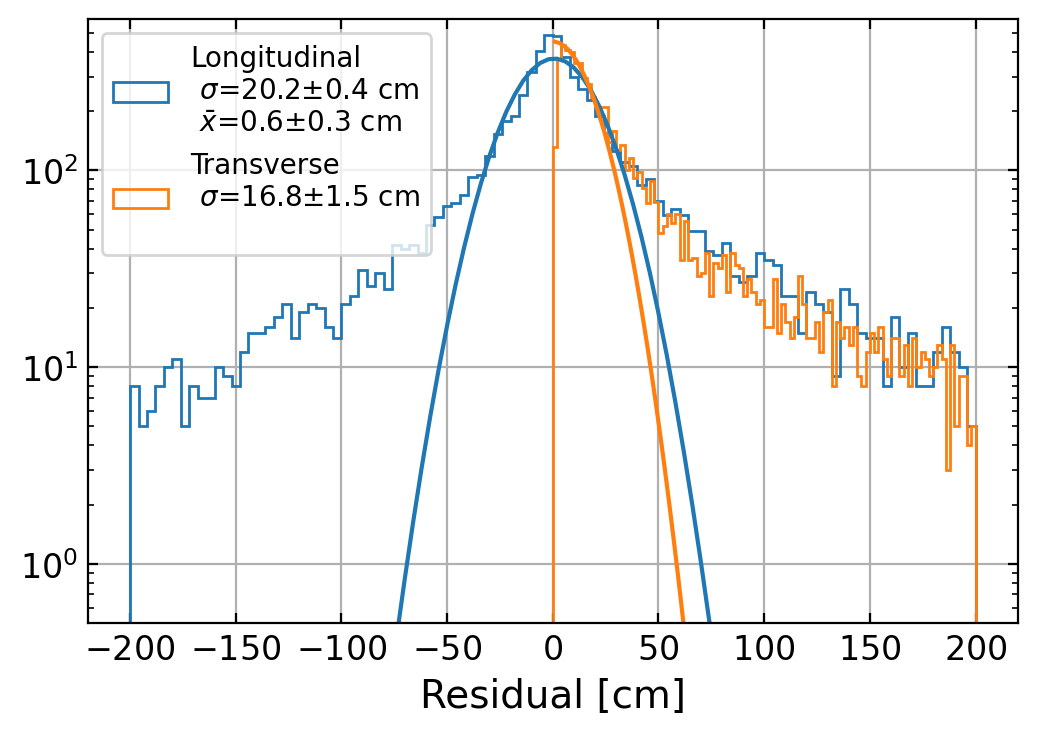

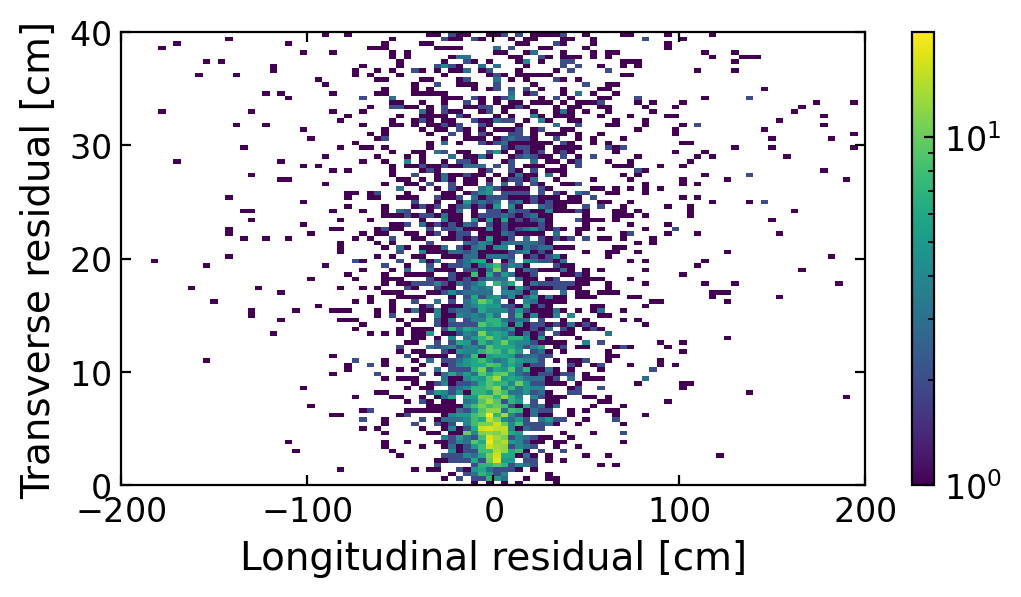

In [15]:
# Figure 1, longi vs axial
n,ibins,p=hist(residual_axial,range=(-200,200),histtype="step",label="Longitudinal");
n2,ibins2,p=hist(residual_radial,range=(0,200),histtype="step",label="Transverse");

bincenters=0.5*(ibins[1:]+ibins[:-1])
bincenters2=0.5*(ibins2[1:]+ibins2[:-1])
yerr=np.sqrt(n);yerr[yerr==0]=1
yerr2=np.sqrt(n2);yerr2[yerr2==0]=1

fwhm1 = util.Utils.fwhm(bincenters,n)
fwhm1 = fwhm1[1]-fwhm1[0]
fwhm2 = util.Utils.fwhm(bincenters2,n2)
fwhm2 = (fwhm2[1]-fwhm2[0])*2
print("Longitudinal HWHM",fwhm1*0.5)
print("Transverse HWHM",fwhm2*0.5)

popt1,pcov = rt.fit_tg(bincenters,n,yerr=yerr,function="gaus",fit_range=(-40,40))
perr1 = np.sqrt(np.diag(pcov))
print(popt1[2],'[cm]')
plot(bincenters, util.Utils.Gauss(bincenters,*popt1),color="C0")
popt2,pcov = rt.fit_tg(bincenters2,n2,yerr=yerr2,function="gaus",set_constant=[[1,0]],initial_values=[max(n2),0,3],fit_range=(5,15),option="BQS")
perr2 = np.sqrt(np.diag(pcov))
print(popt2[2],'[cm]')
plot(bincenters2, util.Utils.Gauss(bincenters2,*popt2),color="C1")
yscale("log")
xlabel("Residual [cm]")
legend(fontsize=10,loc="upper left")
handles, labels = gca().get_legend_handles_labels()
labels[0] = labels[0]+f"\n $\sigma$={popt1[2]:.1f}$\pm${perr1[2]:.1f} cm\n "+r"$\bar{x}$"+f"={popt1[1]:.1f}$\pm${perr1[1]:.1f} cm"
labels[1] = labels[1]+f"\n $\sigma$={popt2[2]:.1f}$\pm${perr2[2]:.1f} cm\n "
legend(handles, labels,fontsize=10,loc="upper left")
grid()
ylim(bottom=0.5,top=max([max(n),max(n2)])*1.2)
savefig(f"{filelables[ifile]}_resolution_position")
show()


# Figure 2
subplots(figsize=(6,3))
hist2d(residual_axial, residual_radial,range=((-200,200),(0,40)),bins=(100,100),norm=LogNorm());
xlabel("Longitudinal residual [cm]")
ylabel("Transverse residual [cm]")
colorbar()
savefig(f"{filelables[ifile]}_longi_vs_trans")
show()

In [16]:
# Tracks_chi2 = util.Utils.flatten1d(util.appcut(data["tracks_chi2"],mask))
# Tracks_ndigi = util.Utils.flatten1d(util.appcut(data["tracks_ndigi"],mask))
# Tracks_ndof = Tracks_ndigi*4-6
# Tracks_chi2_prob = 1-scipy.stats.chi2.cdf(Tracks_chi2*Tracks_ndof, Tracks_ndof)

In [17]:
track_km_x_est = util.unzip(util.c2list(ev.Tree.x_estimates_m))
track_km_y_est = util.unzip(util.c2list(ev.Tree.y_estimates_m))

In [18]:

Tracks_chi2 = []
Tracks_ndigi = []
Tracks_ndof = []
Tracks_floorwallhit=[]
# Tracks_wallhit=[] 
for i, entry  in  enumerate(Entry):
    vertices = data["vertices_recon"][entry]
    vertex_truth = Vertices_truth[i]
    recon_truth_dist = []
    for vrecon in vertices:
        recon_truth_dist.append(np.linalg.norm((np.array(vrecon) - vertex_truth)[:3]))
    vertex_ind = np.argmin(recon_truth_dist)
    
    # Track purity
    ev.Tree.GetEntry(entry)
    track_km_g4inds = util.unzip(util.c2list(ev.Tree.Track_k_m_ids))
    track_km_z_est = util.unzip(util.c2list(ev.Tree.z_estimates_m))
    track_km_y_est = util.unzip(util.c2list(ev.Tree.y_estimates_m))    
    track_km_g4ind_frequent = np.array([util.most_frequent(trackinds) for trackinds in track_km_g4inds])
    vertex_track_inds=util.unzip(np.array(util.c2list(ev.Tree.Vertex_k_m_trackIndices),dtype=int))[vertex_ind]
    track_chi2=[]
    track_ndigi=[]
    track_ndof=[]
    track_floorwallhit=[]
    for itrack in vertex_track_inds:
        # vertex_track_purities.append(sum(track_km_g4inds[itrack]==track_km_g4ind_frequent[itrack])/len(track_km_g4inds[itrack]))    
        track_chi2.append(ev.Tree.Track_k_m_smooth_chi_sum.at(int(itrack)))
        track_ndigi.append(len(track_km_g4inds[itrack]))
        track_ndof.append(4*len(track_km_g4inds[itrack])-6)
        track_floorwallhit.append((min(track_km_y_est[itrack])<8500) | (min(track_km_z_est[itrack])<7000))
    Tracks_chi2.append(track_chi2)
    Tracks_ndigi.append(track_ndigi)    
    Tracks_ndof.append(track_ndof)
    Tracks_floorwallhit.append(track_floorwallhit)
    
Tracks_chi2_flat = util.Utils.flatten1d(Tracks_chi2)
Tracks_ndigi_flat = util.Utils.flatten1d(Tracks_ndigi)
Tracks_ndof_flat = util.Utils.flatten1d(Tracks_ndof)   
Tracks_floorwallhit = util.Utils.flatten1d(Tracks_floorwallhit)   
Tracks_chi2_prob = 1-scipy.stats.chi2.cdf(Tracks_chi2_flat*Tracks_ndof_flat, Tracks_ndof_flat)

In [64]:
4*3-2,4*4-6

(10, 10)

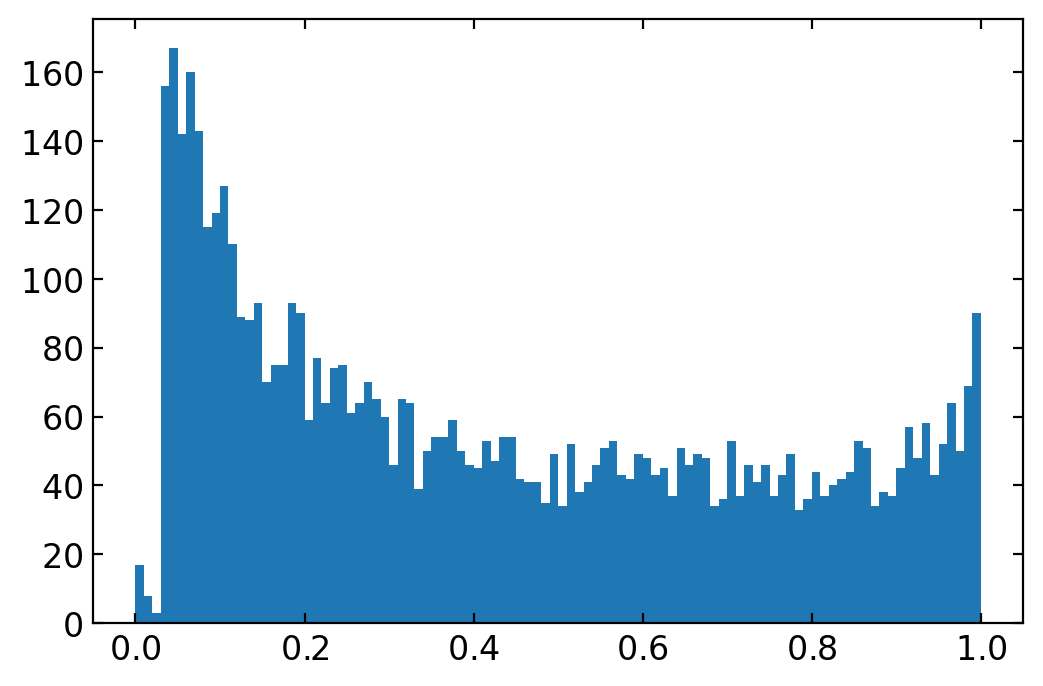

In [76]:
Tracks_ndof_flat2 = Tracks_ndigi_flat*3-4
Tracks_chi2_prob2 = 1-scipy.stats.chi2.cdf(Tracks_chi2_flat*Tracks_ndof_flat, Tracks_ndof_flat2)

hist(Tracks_chi2_prob2[(Tracks_ndigi_flat==4)&(Tracks_purity_flat==1)]);

In [36]:
scipy.stats.chi2.cdf(8,14)

0.1106739784025736

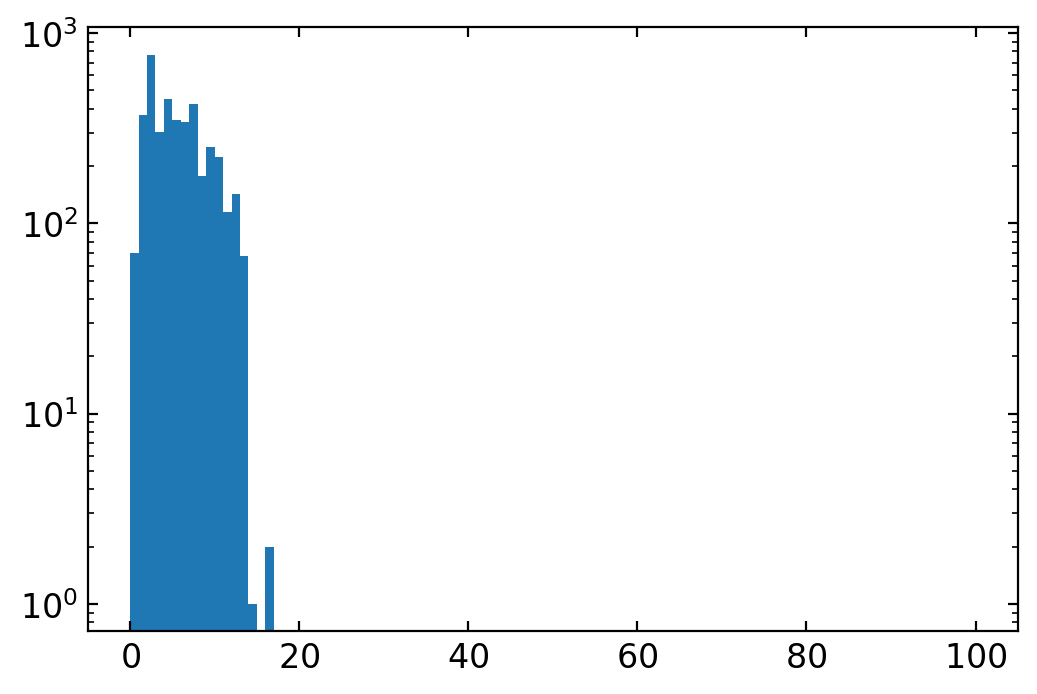

In [39]:
hist((Tracks_chi2_flat*Tracks_ndof_flat)[Tracks_chi2_prob>0.98],range=(0,100),log=1);

Text(0.5, 0, 'Track DOF')

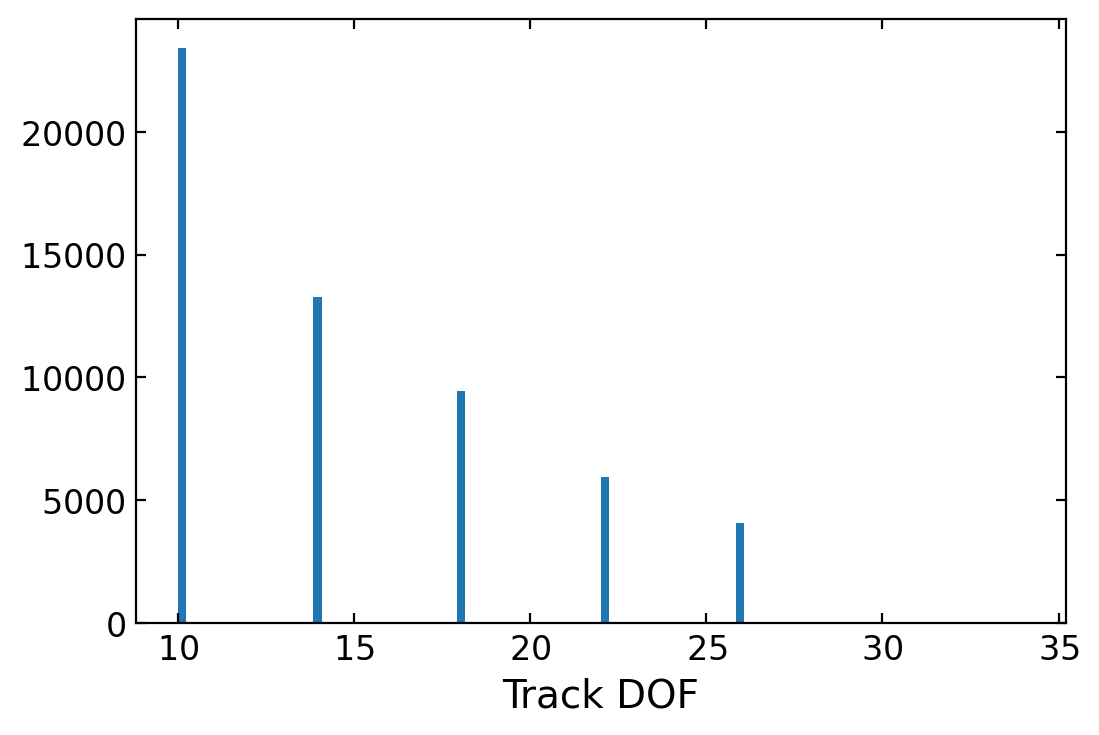

In [19]:
hist(Tracks_ndof_flat);
xlabel("Track DOF")

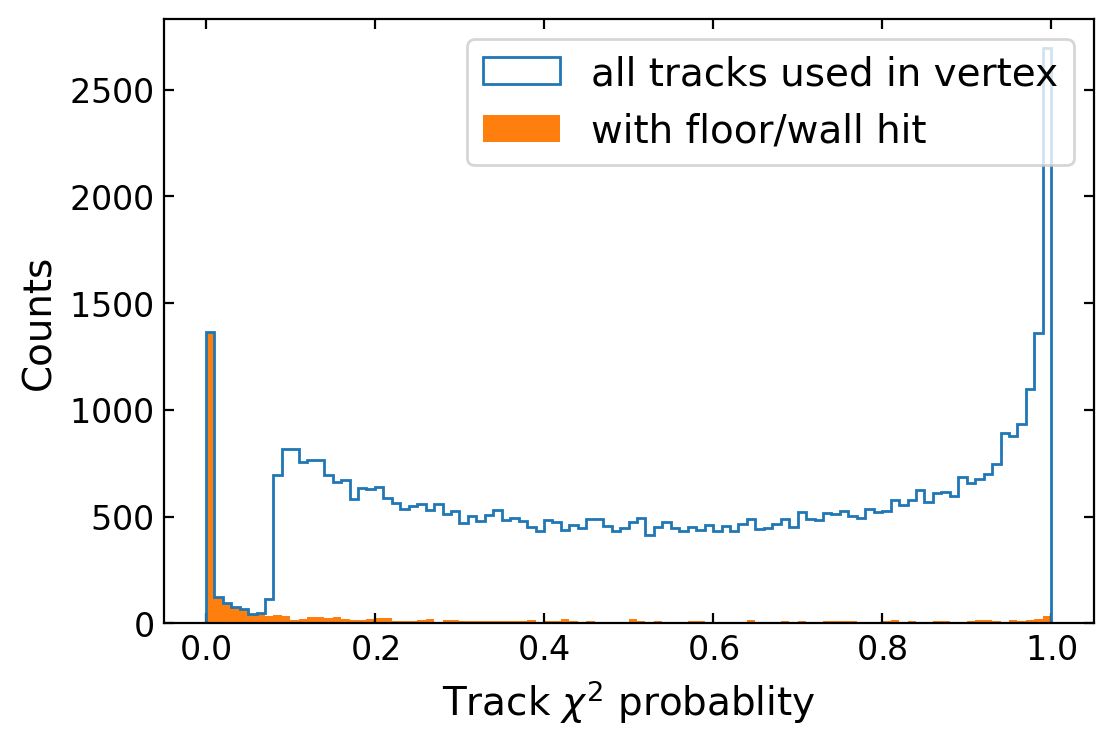

In [20]:
hist(Tracks_chi2_prob,range=(0,1), label="all tracks used in vertex", histtype="step");
hist(Tracks_chi2_prob[Tracks_floorwallhit],range=(0,1),label="with floor/wall hit");
# yscale("log")
xlabel("Track $\chi^2$ probablity")
ylabel("Counts")
legend()

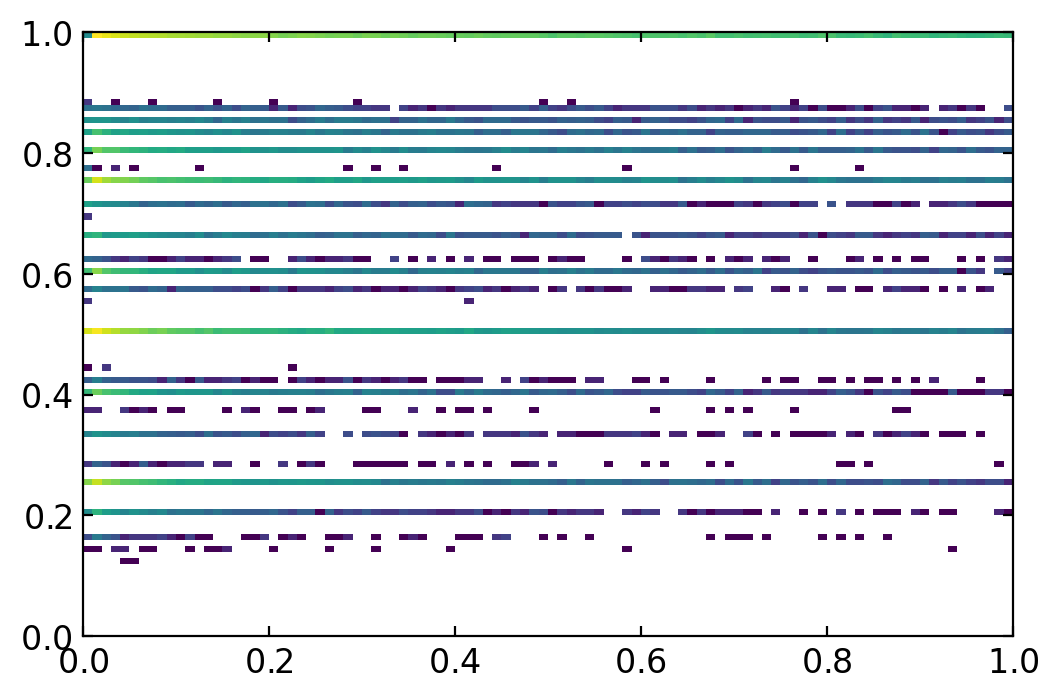

In [49]:
hist2d(Tracks_chi2_prob2, Tracks_purity_flat,range=((0,1),(0,1)),bins=(100,100),norm=LogNorm());

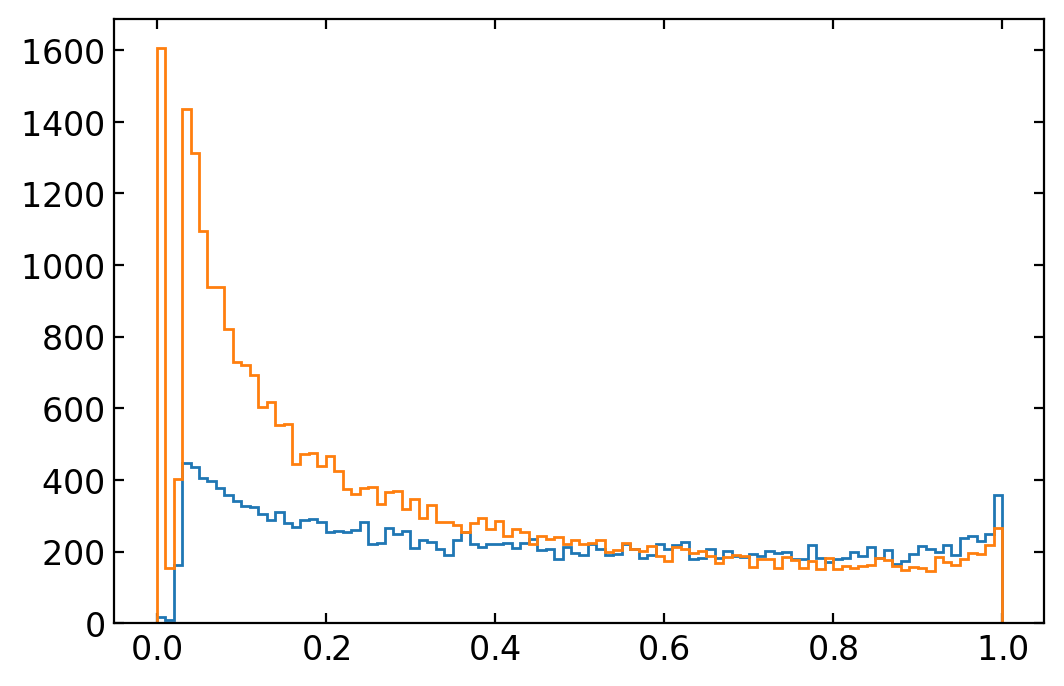

In [77]:
hist(Tracks_chi2_prob2[Tracks_purity_flat==1],range=(0,1),histtype="step");
hist(Tracks_chi2_prob2[Tracks_purity_flat<1],range=(0,1),histtype="step");

In [25]:
sum(Tracks_chi2_prob<0.1)/len(Tracks_chi2_prob)

0.06128

Text(0, 0.5, 'Counts')

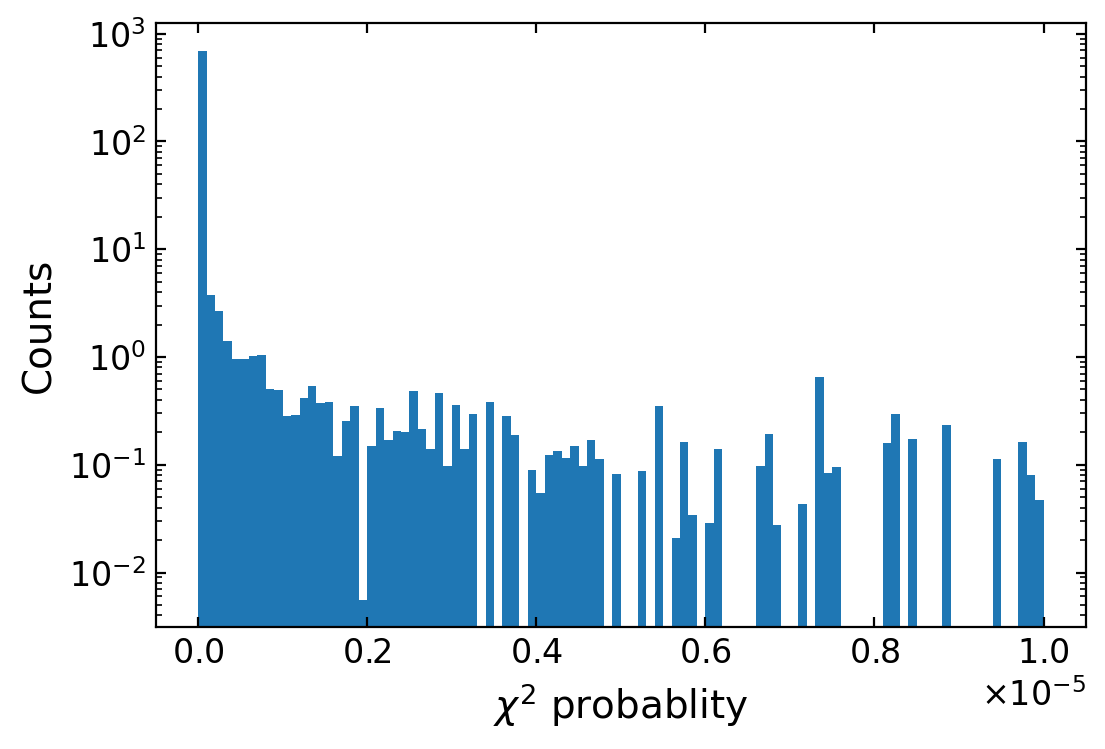

In [53]:
ndof = Vertices_ntracks*3-4
Vertices_chi2_prob = 1-scipy.stats.chi2.cdf(Vertices_chi2*ndof, ndof)

hist(Vertices_chi2_prob,weights = weights[mask],range=(0,0.00001));
yscale("log")
xlabel("$\chi^2$ probablity")
ylabel("Counts")

Mean chi2/dof: 17.64605218816156


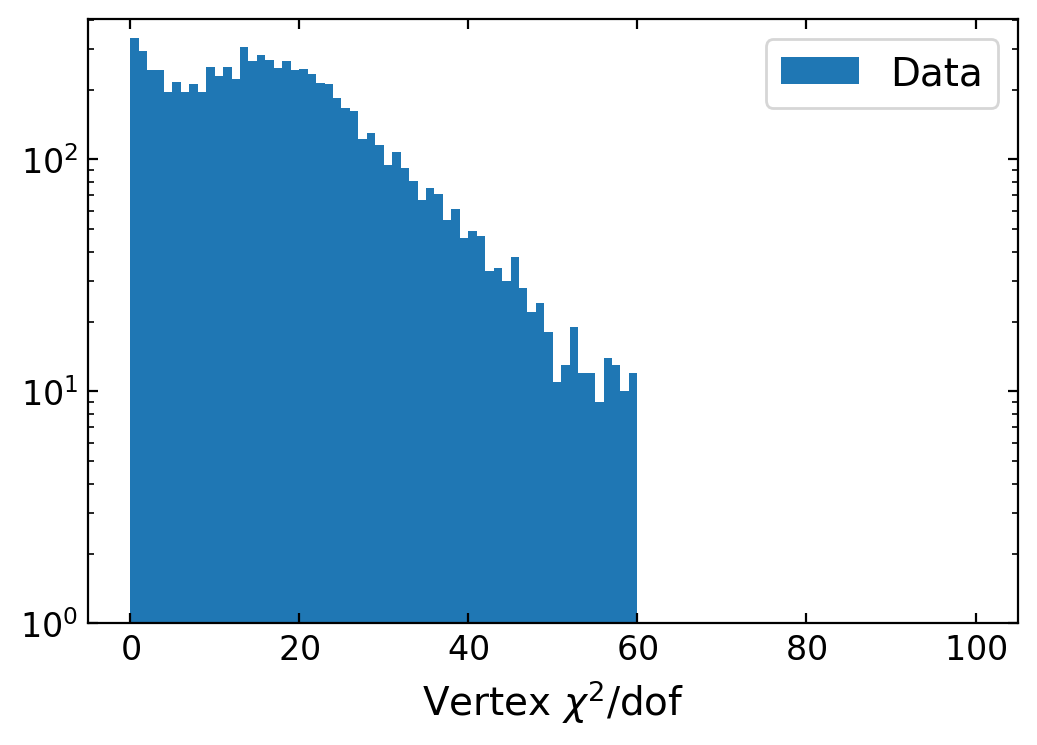

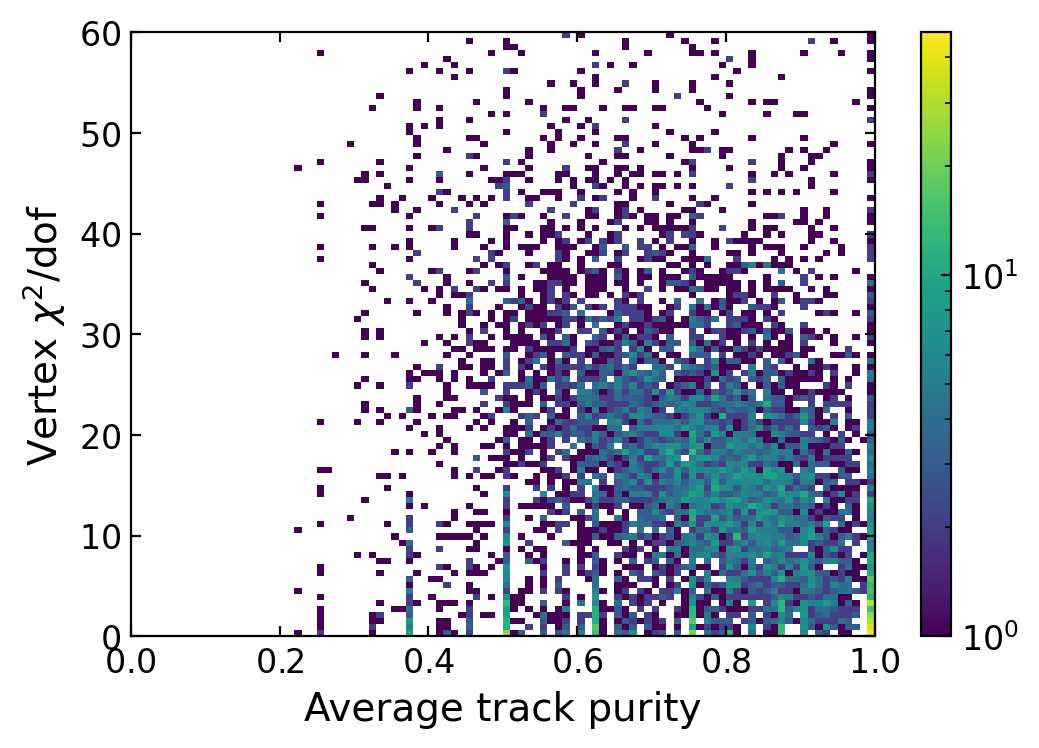

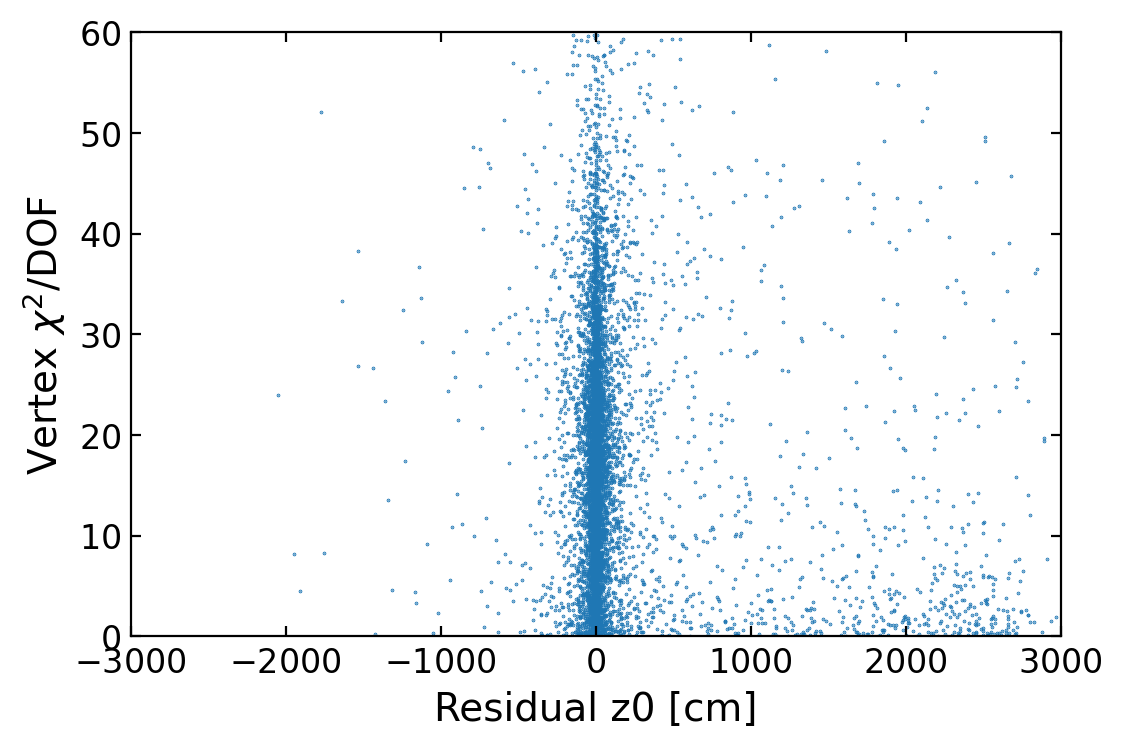

In [17]:
# Figure 3

n,ibins,p = hist(Vertices_chi2,range=(0,100),label="Data");
bincenters = util.Utils.center(ibins)
# y = scipy.stats.chi2.pdf(bincenters,dof)
# plot(bincenters/dof,y/sum(y[:1])*sum(n[:1]),label=r"$\chi^2_{k=2}$")
yscale("log")
xlabel("Vertex $\chi^2$/dof")
print("Mean chi2/dof:",np.mean(Vertices_chi2))
legend()
ylim(1,)
savefig(f"{filelables[ifile]}_chi2")
show()

# hist(Vertex_track_purity);
# show()

hist2d(Vertex_track_purity,Vertices_chi2,bins=(100,100),range=((0,1),(0,60)),norm=LogNorm());
colorbar()
xlabel("Average track purity")
ylabel("Vertex $\chi^2$/dof")
savefig(f"{filelables[ifile]}_chi2_vs_purity")
show()



# Figure 4
scatter(residual[:,1], Vertices_chi2,s=0.1);
xlabel("Residual z0 [cm]")
ylabel("Vertex $\chi^2$/DOF")
xlim(-3000,3000)
ylim(0,60)
show()

Text(0.5, 1.0, 'Number of tracks for events with purity of 1')

findfont: Font family ['san-serif'] not found. Falling back to DejaVu Sans.


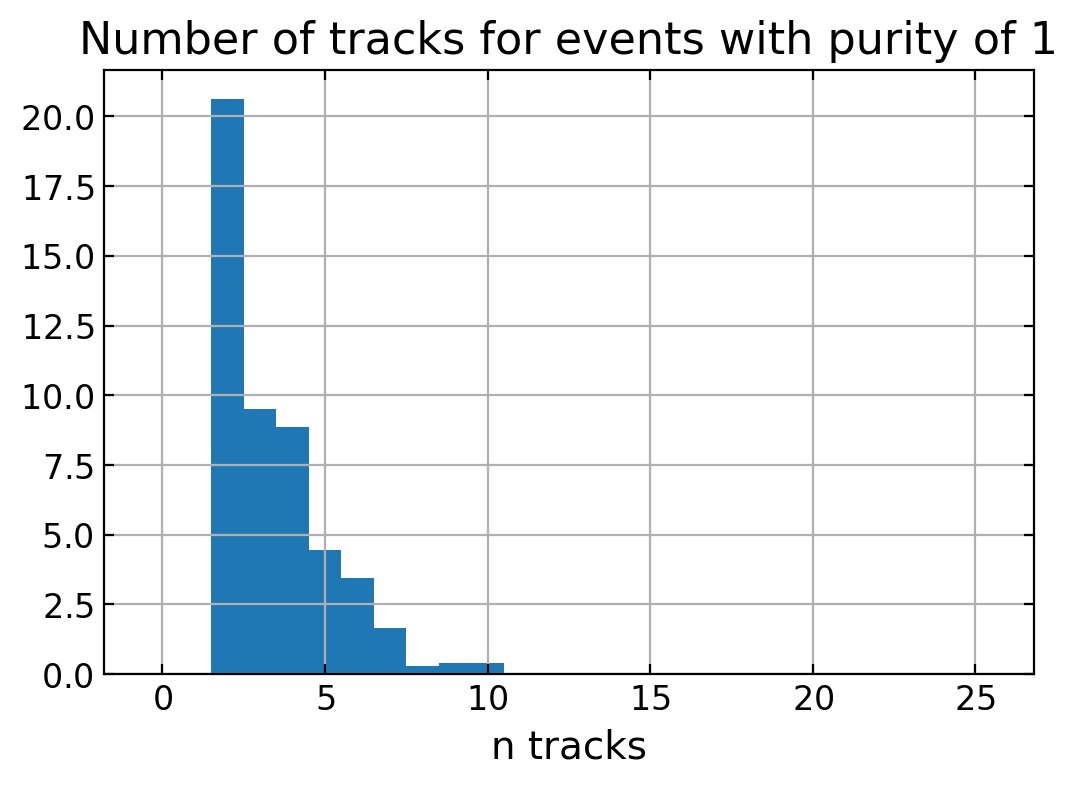

In [18]:
mask_temp = Vertex_track_purity==1
hist(Vertices_ntracks[mask_temp], bins=bins, weights = weights[mask][mask_temp],label="All");
grid()
xlabel("n tracks")
title("Number of tracks for events with purity of 1")

Text(0.5, 1.0, 'Number of tracks per event')

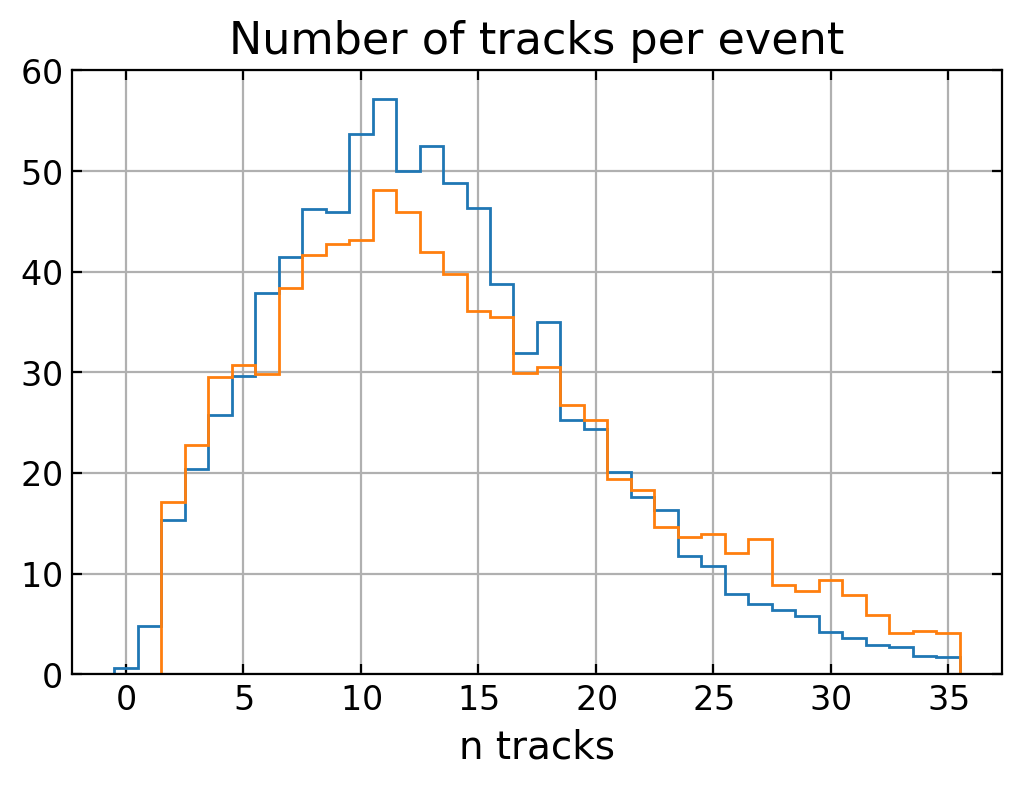

In [19]:
hist(Vertices_ntracks_truth_all, bins=np.linspace(-0.5,35.5,37), weights = weights[mask],label="Truth",histtype="step");
hist(data["tracks_recon_n"][mask], bins=np.linspace(-0.5,35.5,37), weights = weights[mask],label="Recon",histtype="step");

grid()
xlabel("n tracks")
title("Number of tracks per event")

In [31]:
Vertices_err=np.array(Vertices_err)

In [37]:
Vertices_cov = util.appcut(data["vertices_recon_cov"],mask)
Vertices_cov = np.array([v[0] for v in Vertices_cov])

In [42]:
pull

array([[8.79403236e+00, 5.70210111e-02, 1.79687412e-01, ...,
        8.52815473e+01, 4.00776713e-03, 3.12013121e+02],
       [1.51250853e+03, 9.80719225e+00, 3.09049061e+01, ...,
        1.46677955e+04, 6.89306308e-01, 5.36639494e+04],
       [5.00759209e+02, 3.24695148e+00, 1.02319531e+01, ...,
        4.85619320e+03, 2.28214568e-01, 1.77669853e+04],
       ...,
       [5.03326256e+00, 3.26359636e-02, 1.02844052e-01, ...,
        4.88108755e+01, 2.29384466e-03, 1.78580643e+02],
       [1.92334349e+04, 1.24710697e+02, 3.92994476e+02, ...,
        1.86519337e+05, 8.76539054e+00, 6.82404134e+05],
       [1.75634080e+01, 1.13882147e-01, 3.58871017e-01, ...,
        1.70323982e+02, 8.00429728e-03, 6.23151419e+02]])

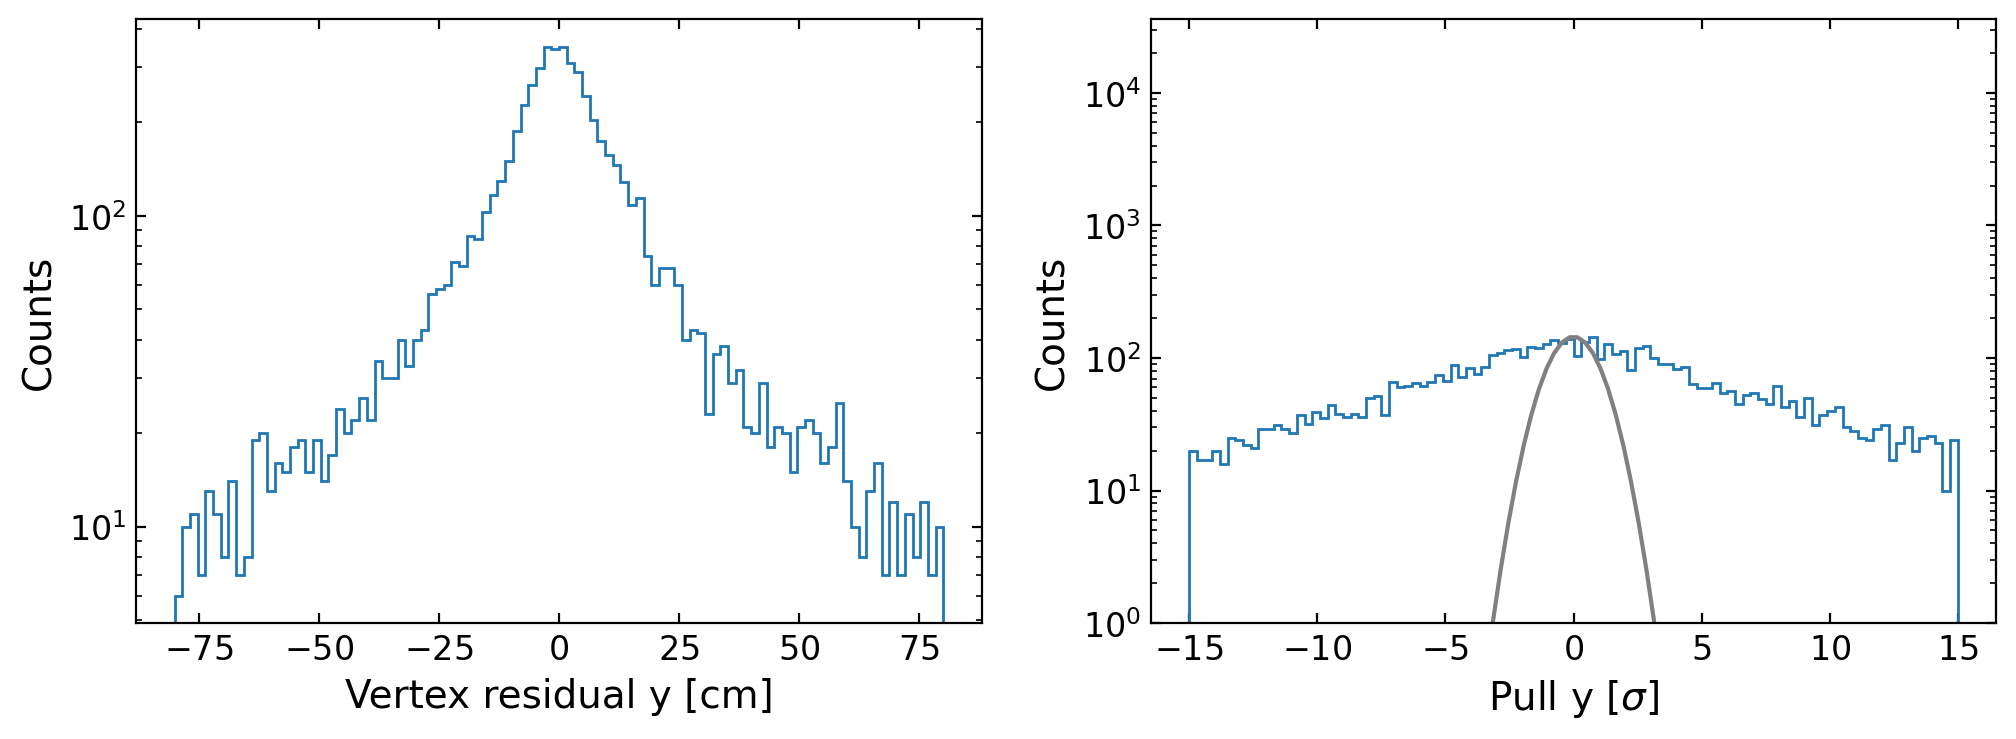

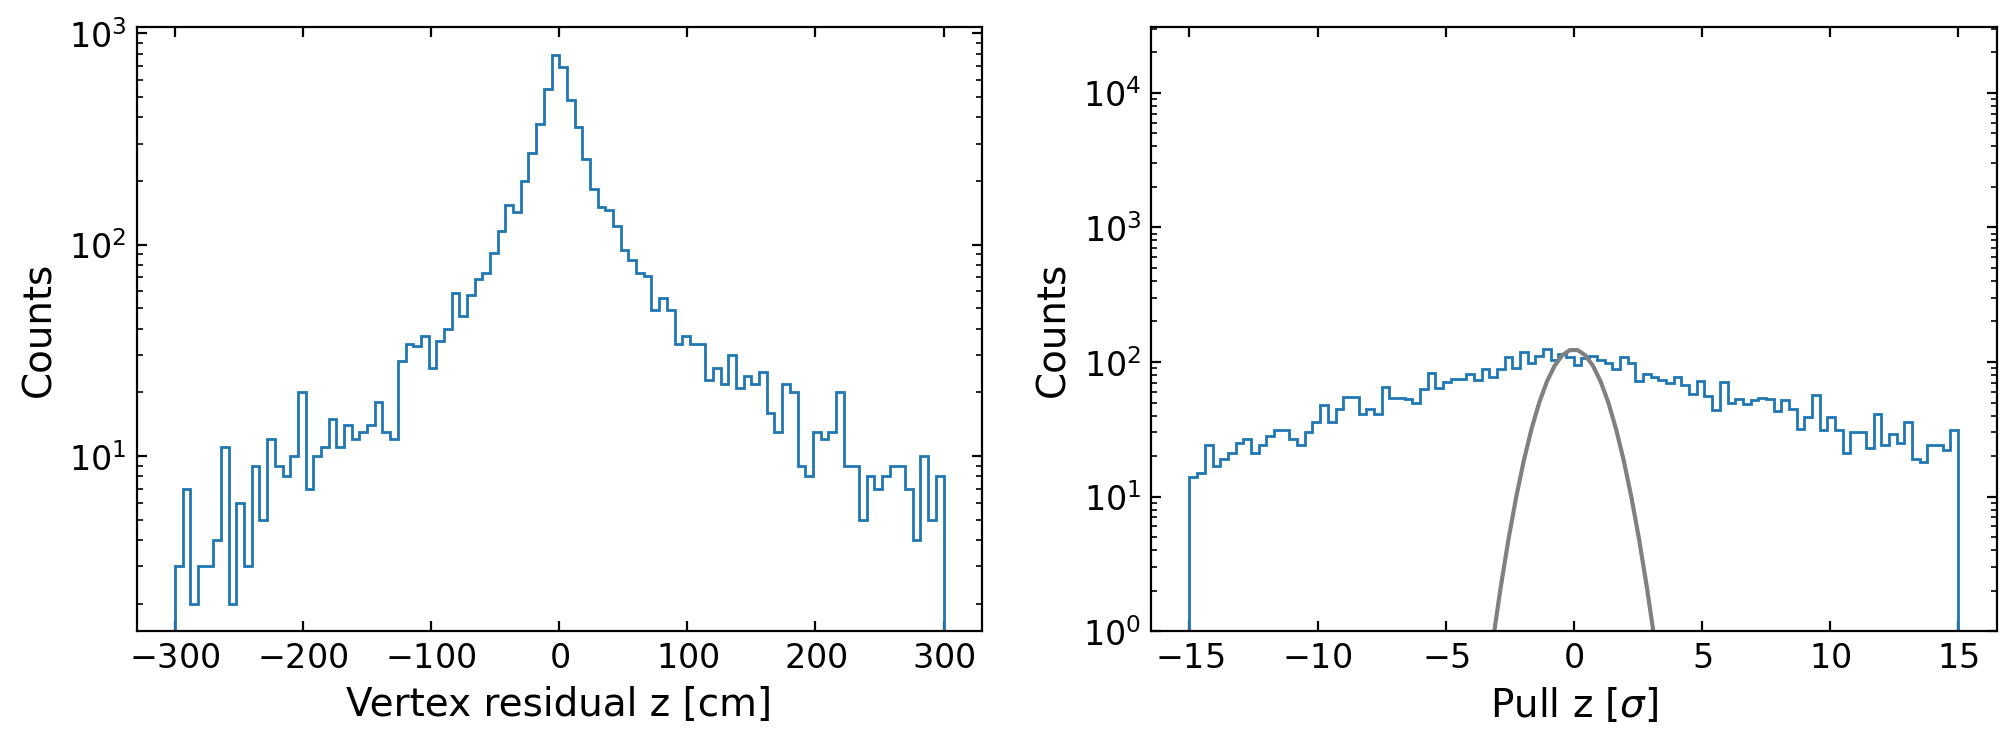

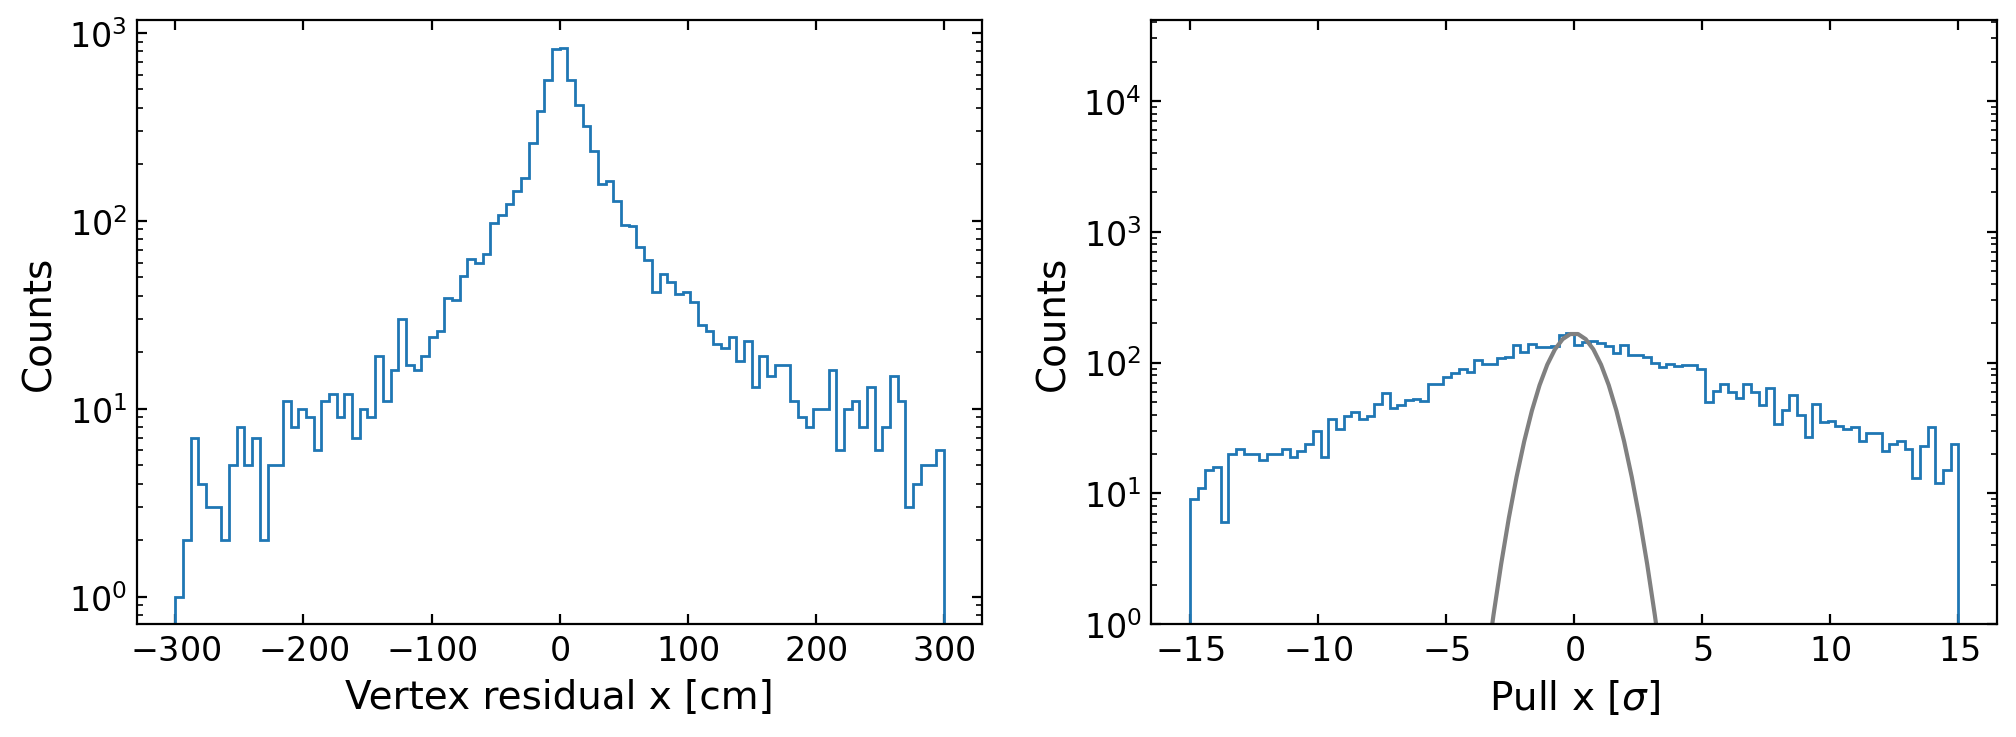

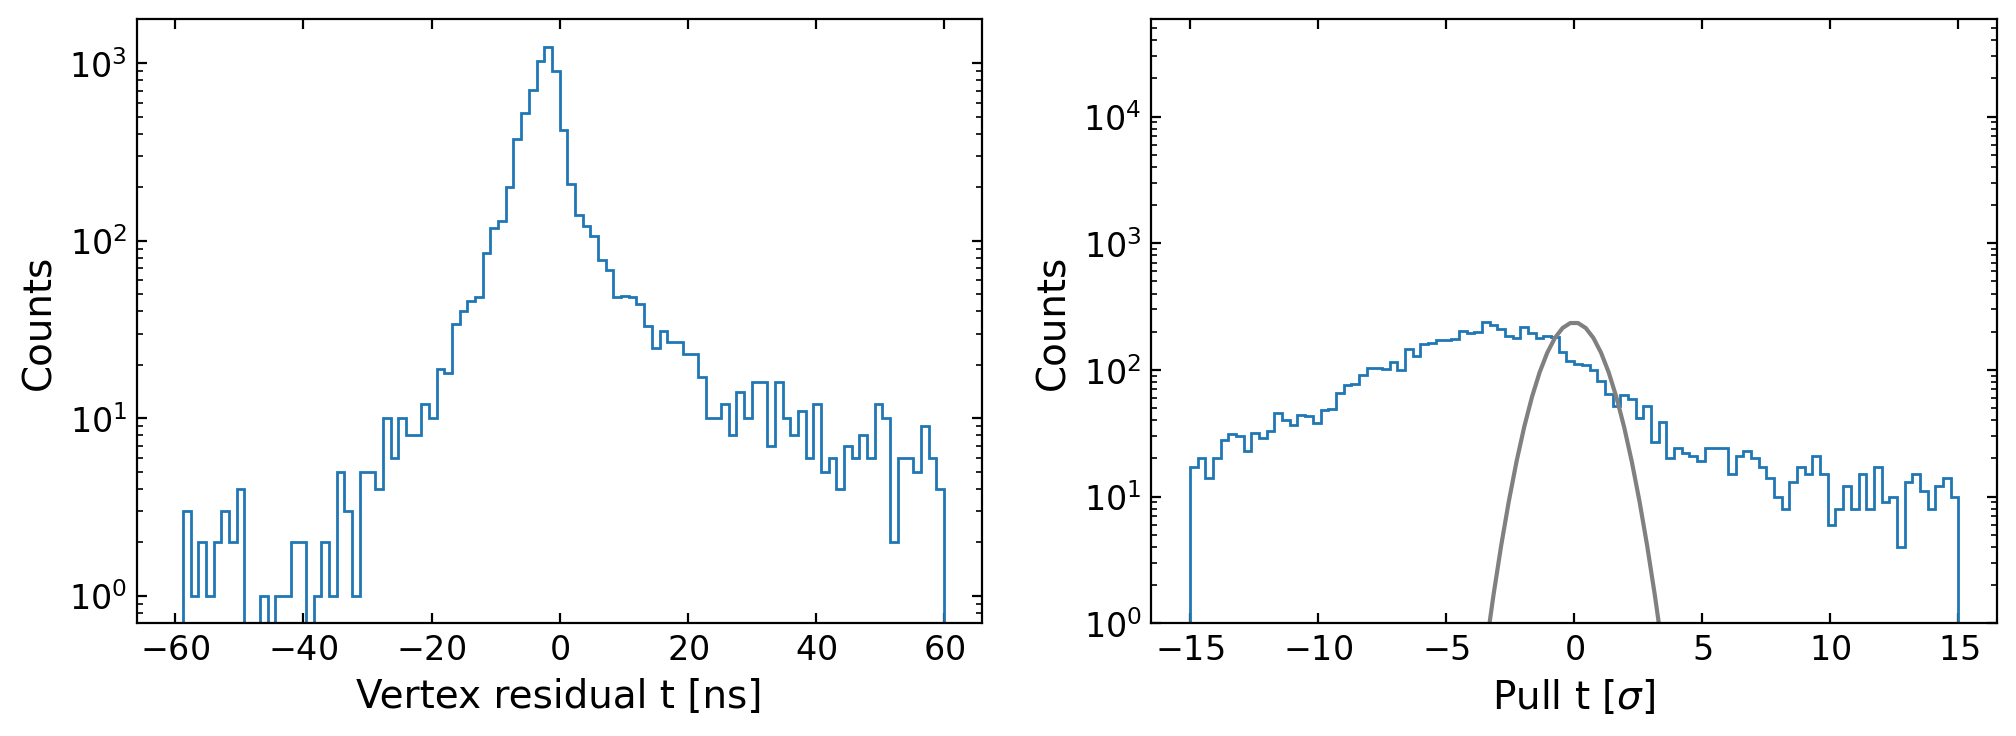

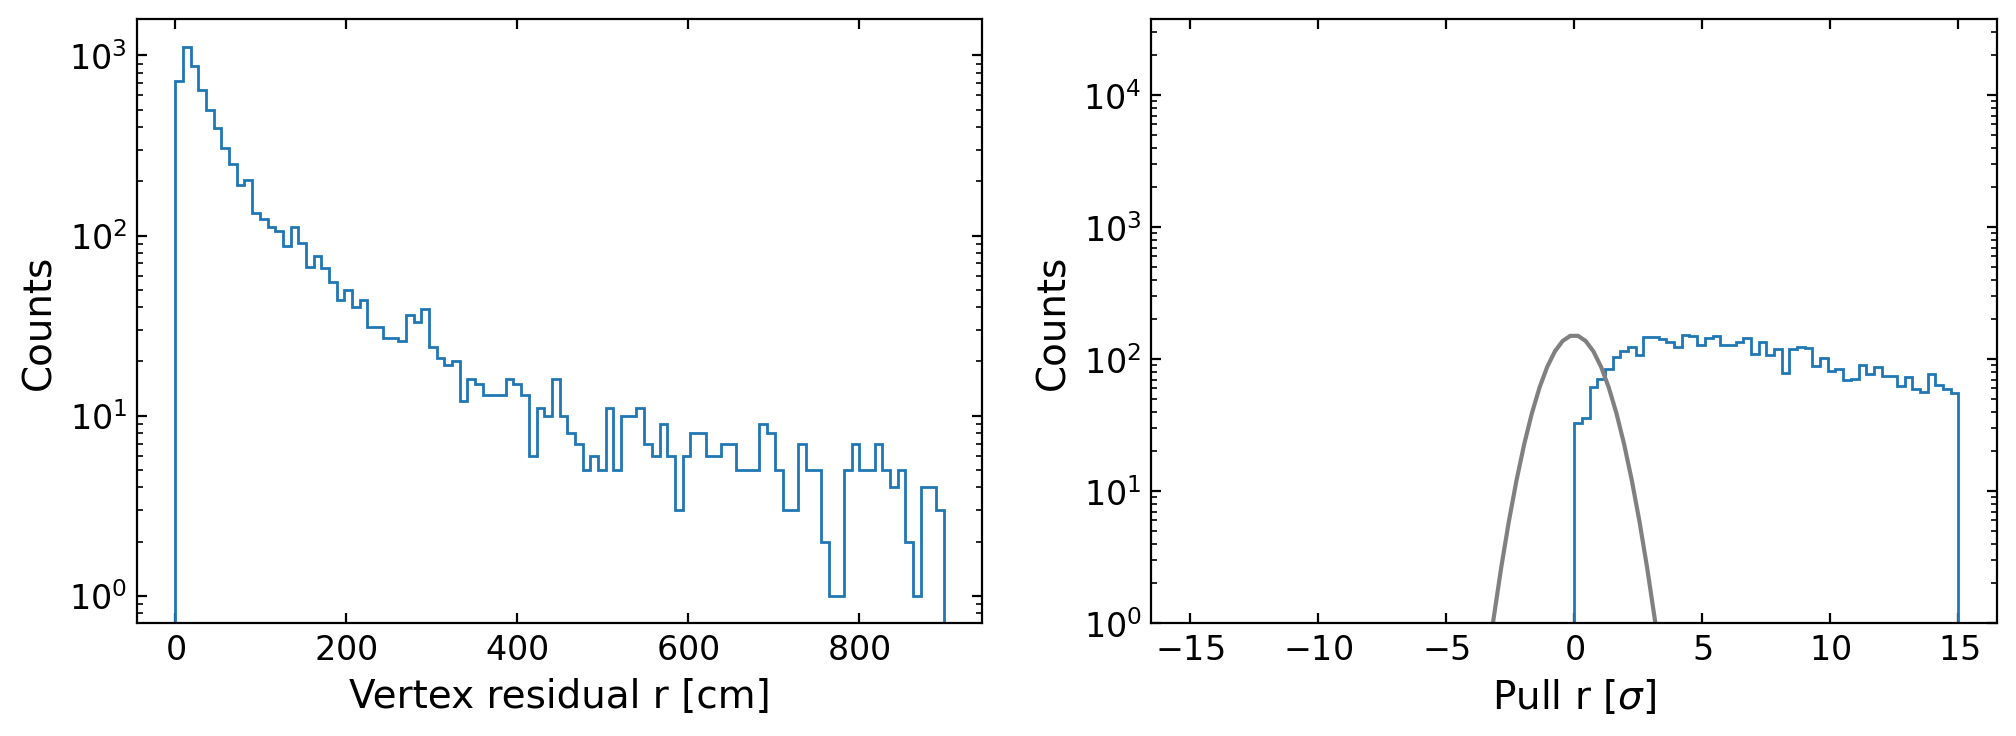

In [44]:
labels=["y [cm]", "z [cm]", "x [cm]", "t [ns]", "r [cm]"]
plot_ranges=[[-80,80],[-300,300],[-300,300],[-60,60],[0,900]]

plotlabels = ["Original", "+Bug fix", "+Seed mod"]

# for i in [3,4]:
# for i in [0,1,2,3]:
for i in [0,1,2,3,4]:
    fig, axs=subplots(1,2,figsize=(12,4))
    unc = Vertices_err

    sca(axs[0])
    if i==4:
        n0,ibins,_ = hist(residual_r,range=plot_ranges[i],histtype="step");    
    else:
        n0,ibins,_ = hist(residual[:,i],range=plot_ranges[i],histtype="step");    
    sca(axs[1])
    if i==4:
        #unc_i = 1/residual[:,4]*np.sqrt(residual[:,1]**2*unc[:,1]**2 + residual[:,2]**2*unc[:,2]**2 + residual[:,0]**2*unc[:,0]**2 )
        unc_i=[]
        for ievent in range(len(Vertices_cov)):
            cov = Vertices_cov[ievent][:3,:3]
            # cov =np.diag(np.diag(cov))
            delta_r = residual[ievent,:3]
            unc_i.append(sqrt(delta_r@cov@delta_r)/residual_r[ievent])
        
        pull = util.pull(residual_r,0,unc_i)

    else:
        unc_i =unc[:,i]
        pull = util.pull(residual[:,i],0,unc_i)

    n0,ibins,_ = hist(pull,range=[-15,15],histtype="step"); 
    ibins=util.Utils.center(ibins)
    plot(ibins,util.Utils.Gauss(ibins,max(n0),0,1),color="grey")
    
    sca(axs[0])
    xlabel("Vertex residual "+labels[i])
    ylabel("Counts")
    yscale("log")
    sca(axs[1])
    xlabel("Pull "+labels[i].split(" ")[0]+r" [$\sigma$]")
    ylabel("Counts")
    yscale("log")  
    ylim(bottom=1)
    show()

---
# Analysis (no truth involved)

In [20]:
# Recon -----------------------------------
# Pick the vertices that is closest to the truth
Vertices_rank1=[]
Vertices_rank1_err=[]
Vertices_rank1_chi2=[]
Vertices_rank1_ntracks=[]
Vertices_rank1_ntracks_truth=[]
Vertices_rank1_n = []
Vertex_rank1_track_purity=[]
Vertex_rank1_track_purity_std=[]
for i, entry  in  enumerate(Entry):
    vertices = data["vertices_recon"][entry]
    vertex_truth = Vertices_truth[i]
    # recon_truth_dist = []
    # for vrecon in vertices:
    #     recon_truth_dist.append(np.linalg.norm((np.array(vrecon) - vertex_truth)[:3]))
    # vertex_ind = np.argmin(recon_truth_dist)
    vertex_ind = np.argmax(data["vertices_ntrack"][entry])
    
    # Track purity
    ev.Tree.GetEntry(entry)
    track_km_g4inds = util.unzip(util.c2list(ev.Tree.Track_k_m_ids))
    track_km_g4ind_frequent = np.array([util.most_frequent(trackinds) for trackinds in track_km_g4inds])
    vertex_track_inds=util.unzip(np.array(util.c2list(ev.Tree.Vertex_k_m_trackIndices),dtype=int))[vertex_ind]
    vertex_track_purities = []   
    for itrack in vertex_track_inds:
        vertex_track_purities.append(sum(track_km_g4inds[itrack]==track_km_g4ind_frequent[itrack])/len(track_km_g4inds[itrack]))    
    Vertex_rank1_track_purity.append(np.mean(vertex_track_purities))
    Vertex_rank1_track_purity_std.append(np.std(vertex_track_purities))    
    
    
    Vertices_rank1_n.append(len(vertices))
    Vertices_rank1.append(vertices[vertex_ind])
    Vertices_rank1_err.append(data["vertices_recon_error"][entry][vertex_ind])
    Vertices_rank1_chi2.append(data["vertices_chi2"][entry][vertex_ind])
    Vertices_rank1_ntracks_truth.append(data["vertices_ntrack_truth"][entry])
    Vertices_rank1_ntracks.append(data["vertices_ntrack"][entry][vertex_ind])
Vertices_rank1_chi2=np.array(Vertices_rank1_chi2)    
Vertices_rank1_ntracks=np.array(Vertices_rank1_ntracks)
Vertices_rank1_n=np.array(Vertices_rank1_n)
Vertex_rank1_track_purity=np.array(Vertex_rank1_track_purity)
Vertex_rank1_track_purity_std=np.array(Vertex_rank1_track_purity_std)
    
    
# Residual: --------------------------------------------
# each entry is [dx, dy, dz, dt]
residual_rank1 = (Vertices_rank1 - Vertices_truth)
residual_rank1_r = np.linalg.norm(residual_rank1[:,:3],axis=1) # Total position residual
residual_rank1_axial  = np.array([np.dot(residual_rank1[i][:3],Vertices_truth_direction_unit[i]) for i in range(len(residual_rank1))])    
residual_rank1_radial = np.array([np.linalg.norm(np.cross(residual_rank1[i][:3],Vertices_truth_direction_unit[i])) for i in range(len(residual_rank1))])

In [21]:
fig_idx="1"

Efficiency (2m cut): 0.59
Efficiency (4m cut): 0.64


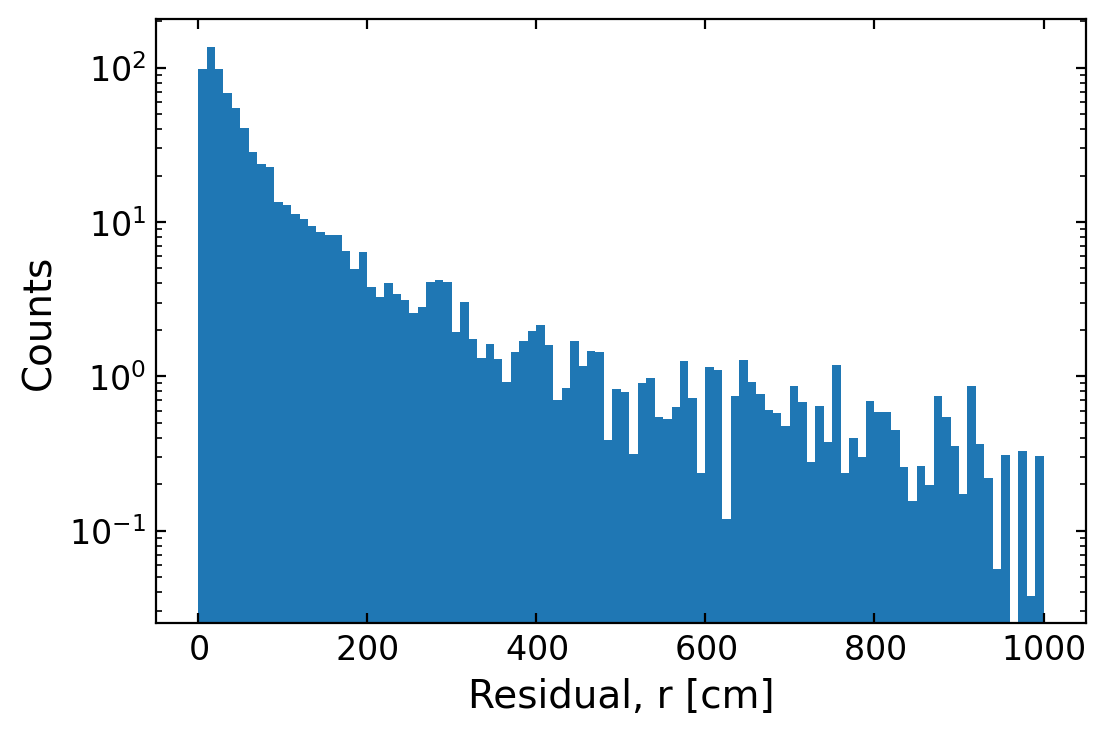

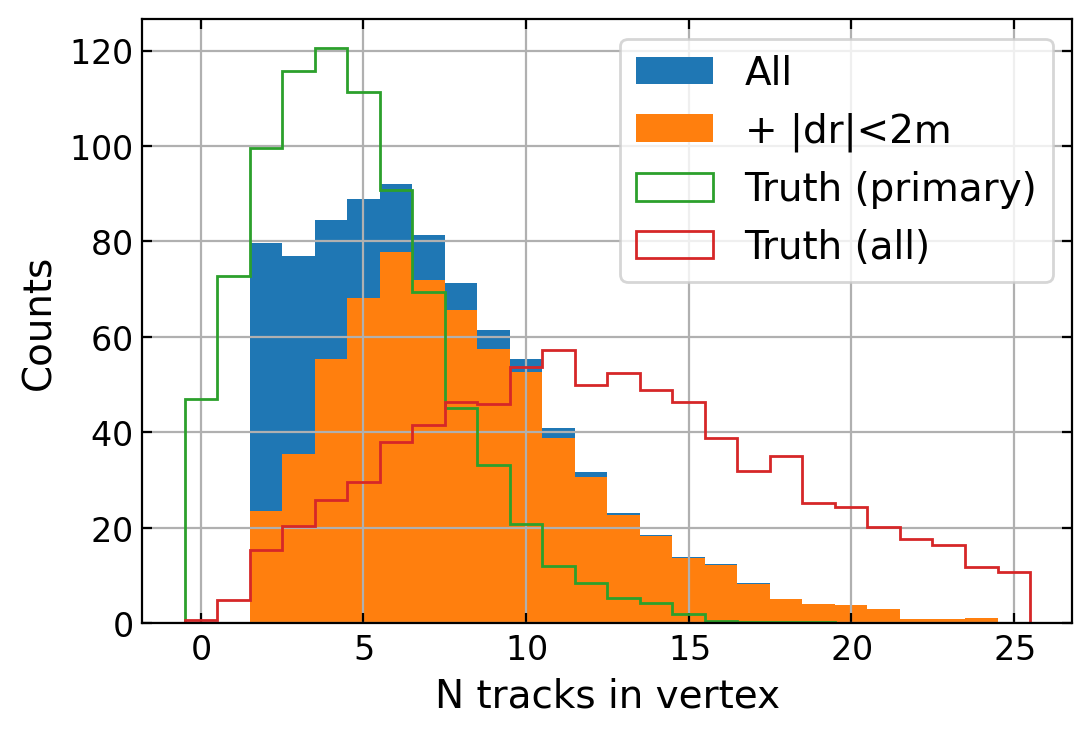

In [28]:
mask_residual_rank1 = residual_rank1_r<200
mask_residualwide_rank1 = residual_rank1_r<500
n,ibins,p = hist(residual_rank1_r,log=1,range=(0,1e3), weights = weights[mask]);
efficiency = sum(mask_residual_rank1)/n_original
efficiency2 = sum(residual_rank1_r<400)/n_original
print("Efficiency (2m cut):", f"{efficiency:.2f}")
print("Efficiency (4m cut):", f"{efficiency2:.2f}")
xlabel("Residual, r [cm]")
ylabel("Counts")
savefig(f"{filelables[ifile]}_vertex_dr_{fig_idx}")
show()

bins=np.linspace(-0.5,25.5,27)
hist(Vertices_rank1_ntracks, bins=bins, weights = weights[mask],label="All");
hist(Vertices_rank1_ntracks[mask_residual_rank1], bins=bins, weights = weights[mask][mask_residual_rank1],label="+ |dr|<2m");
hist(Vertices_ntracks_truth, bins=bins, weights = weights[mask],label="Truth (primary)", histtype="step");
hist(Vertices_ntracks_truth_all, bins=bins, weights = weights[mask],label="Truth (all)", histtype="step");grid()
xlabel("N tracks in vertex")
ylabel("Counts")
legend()
savefig(f"{filelables[ifile]}_vertex_ntracks_{fig_idx}")
show()

In [29]:
n_original_weighted = sum(weights_total)
n_reconstructible_weighted = sum(weights_total[all_entry][mask_reconstructible])
k_reconstructible_weighted = n_reconstructible_weighted/n_original_weighted

n_reconstructible_weighted2 = sum(weights_total[all_entry][mask_reconstructible2])
k_reconstructible_weighted2 = n_reconstructible_weighted2/n_original_weighted

n_pass_weighted = sum(weights_total[all_entry][mask][mask_residual_rank1])
n_pass_weightedwide = sum(weights_total[all_entry][mask][mask_residualwide_rank1])
eff_pass = n_pass_weighted/n_original_weighted
eff_passwide = n_pass_weightedwide/n_original_weighted
print(f"reconstructible, weighted: {k_reconstructible_weighted*100:.1f}%")
# print(f"reconstructible, weighted (including secondaries):  {k_reconstructible_weighted2*100:.1f}%")
print(f"efficiency (2m cut),  weighted: {eff_pass*100:.1f}%")
print(f"efficiency (4m cut),  weighted: {eff_passwide*100:.1f}%")
print(f"ratio: {eff_pass/k_reconstructible_weighted*100:.1f}%")

reconstructible, weighted: 77.8%
efficiency (2m cut),  weighted: 70.1%
efficiency (4m cut),  weighted: 76.8%
ratio: 90.0%


Longitudinal HWHM 13.856368563685637
Transverse HWHM 18.949275362318843
20.094969653910784 [cm]
16.66390162698251 [cm]


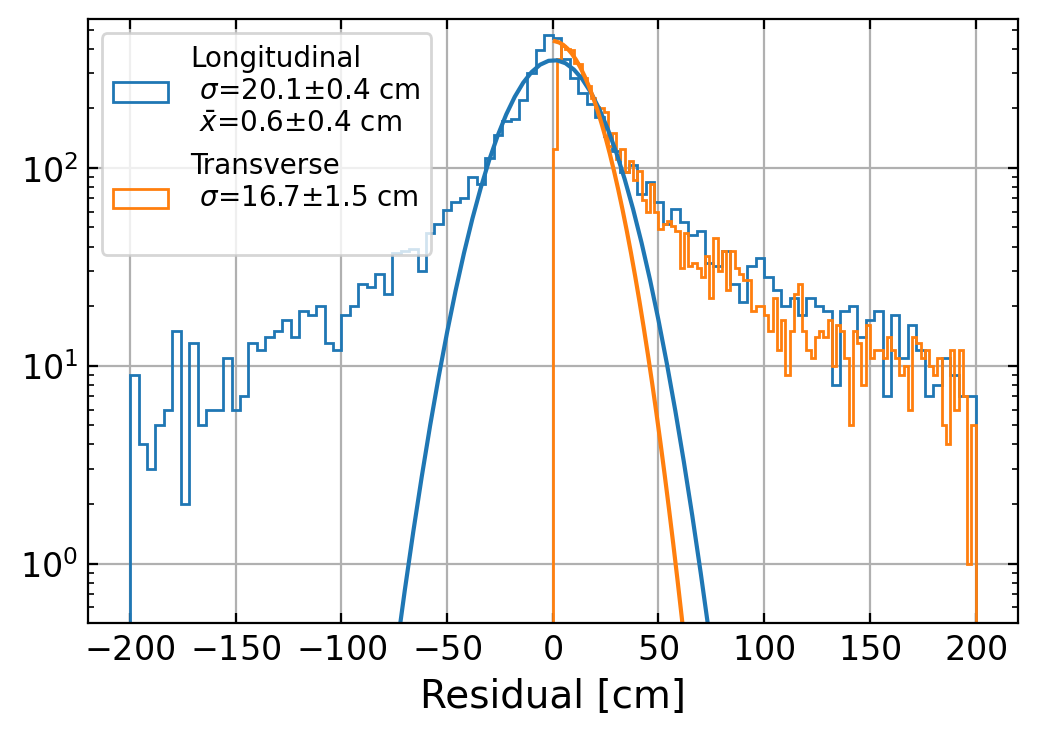

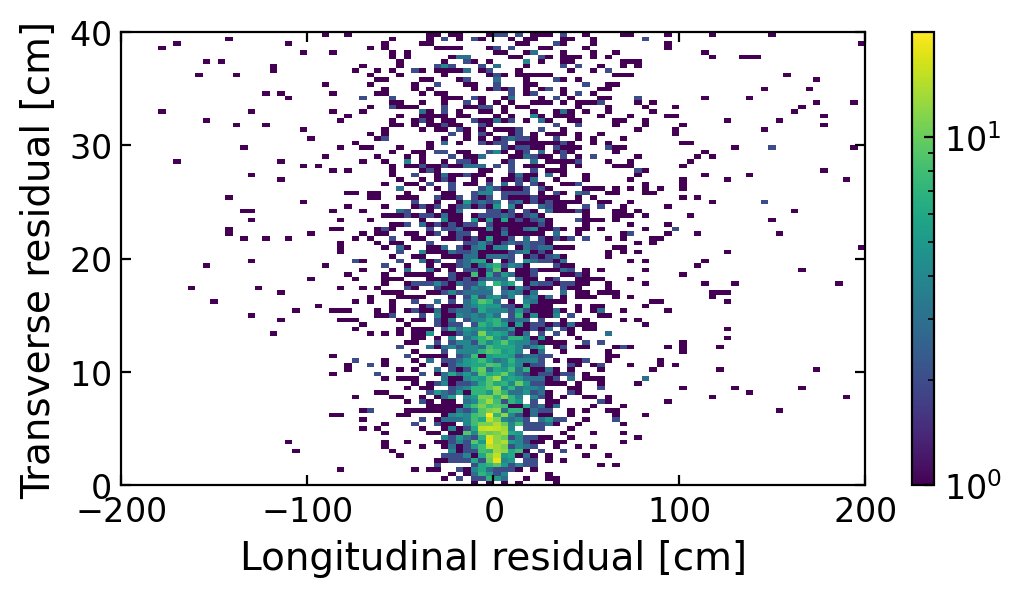

In [24]:
# Figure 1, longi vs axial
n,ibins,p=hist(residual_rank1_axial,range=(-200,200),histtype="step",label="Longitudinal");
n2,ibins2,p=hist(residual_rank1_radial,range=(0,200),histtype="step",label="Transverse");

bincenters=0.5*(ibins[1:]+ibins[:-1])
bincenters2=0.5*(ibins2[1:]+ibins2[:-1])
yerr=np.sqrt(n);yerr[yerr==0]=1
yerr2=np.sqrt(n2);yerr2[yerr2==0]=1

fwhm1 = util.Utils.fwhm(bincenters,n)
fwhm1 = fwhm1[1]-fwhm1[0]
fwhm2 = util.Utils.fwhm(bincenters2,n2)
fwhm2 = (fwhm2[1]-fwhm2[0])*2
print("Longitudinal HWHM",fwhm1*0.5)
print("Transverse HWHM",fwhm2*0.5)

popt1,pcov = rt.fit_tg(bincenters,n,yerr=yerr,function="gaus",fit_range=(-40,40))
perr1 = np.sqrt(np.diag(pcov))
print(popt1[2],'[cm]')
plot(bincenters, util.Utils.Gauss(bincenters,*popt1),color="C0")
popt2,pcov = rt.fit_tg(bincenters2,n2,yerr=yerr2,function="gaus",set_constant=[[1,0]],initial_values=[max(n2),0,3],fit_range=(5,15),option="BQS")
perr2 = np.sqrt(np.diag(pcov))
print(popt2[2],'[cm]')
plot(bincenters2, util.Utils.Gauss(bincenters2,*popt2),color="C1")
yscale("log")
xlabel("Residual [cm]")
legend(fontsize=10,loc="upper left")
handles, labels = gca().get_legend_handles_labels()
labels[0] = labels[0]+f"\n $\sigma$={popt1[2]:.1f}$\pm${perr1[2]:.1f} cm\n "+r"$\bar{x}$"+f"={popt1[1]:.1f}$\pm${perr1[1]:.1f} cm"
labels[1] = labels[1]+f"\n $\sigma$={popt2[2]:.1f}$\pm${perr2[2]:.1f} cm\n "
legend(handles, labels,fontsize=10,loc="upper left")
grid()
ylim(bottom=0.5,top=max([max(n),max(n2)])*1.2)
savefig(f"{filelables[ifile]}_resolution_position_{fig_idx}")
show()


# Figure 2
subplots(figsize=(6,3))
hist2d(residual_rank1_axial, residual_rank1_radial,range=((-200,200),(0,40)),bins=(100,100),norm=LogNorm());
xlabel("Longitudinal residual [cm]")
ylabel("Transverse residual [cm]")
colorbar()
savefig(f"{filelables[ifile]}_longi_vs_trans_{fig_idx}")
show()

Mean chi2/dof: 18.25769989468579


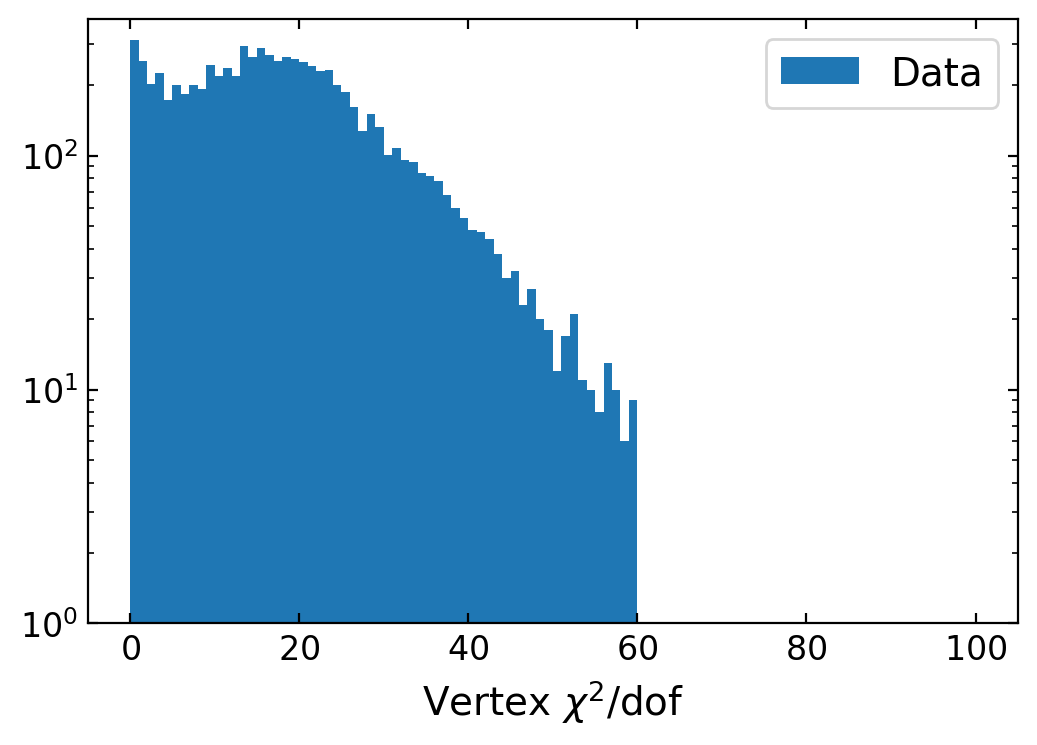

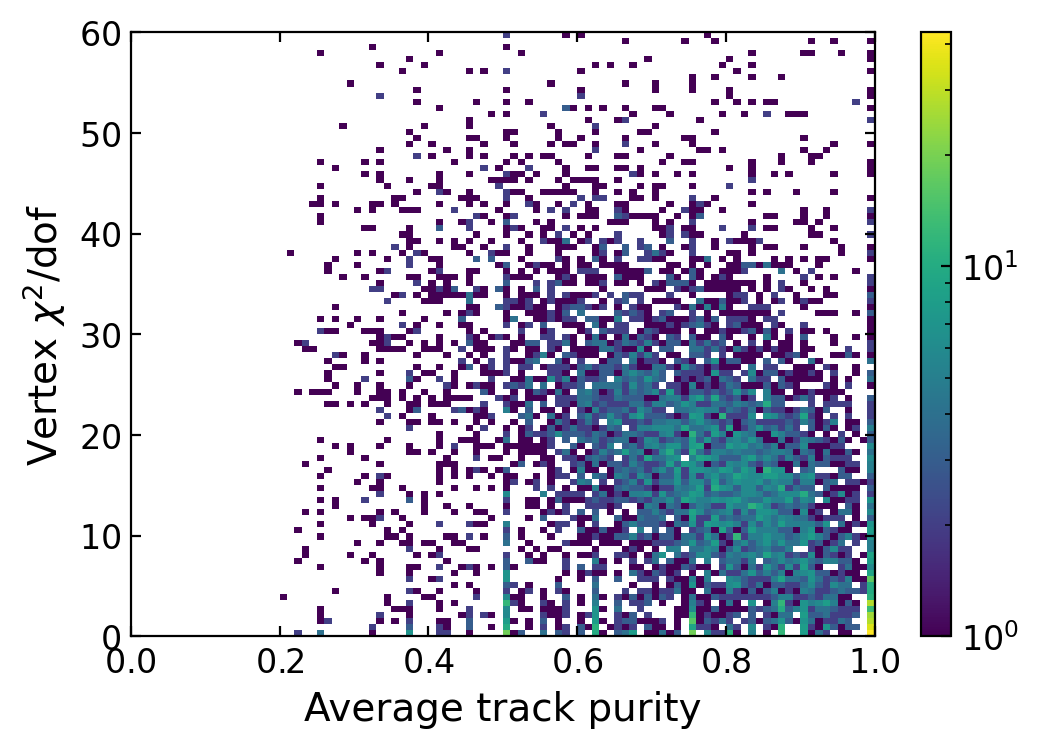

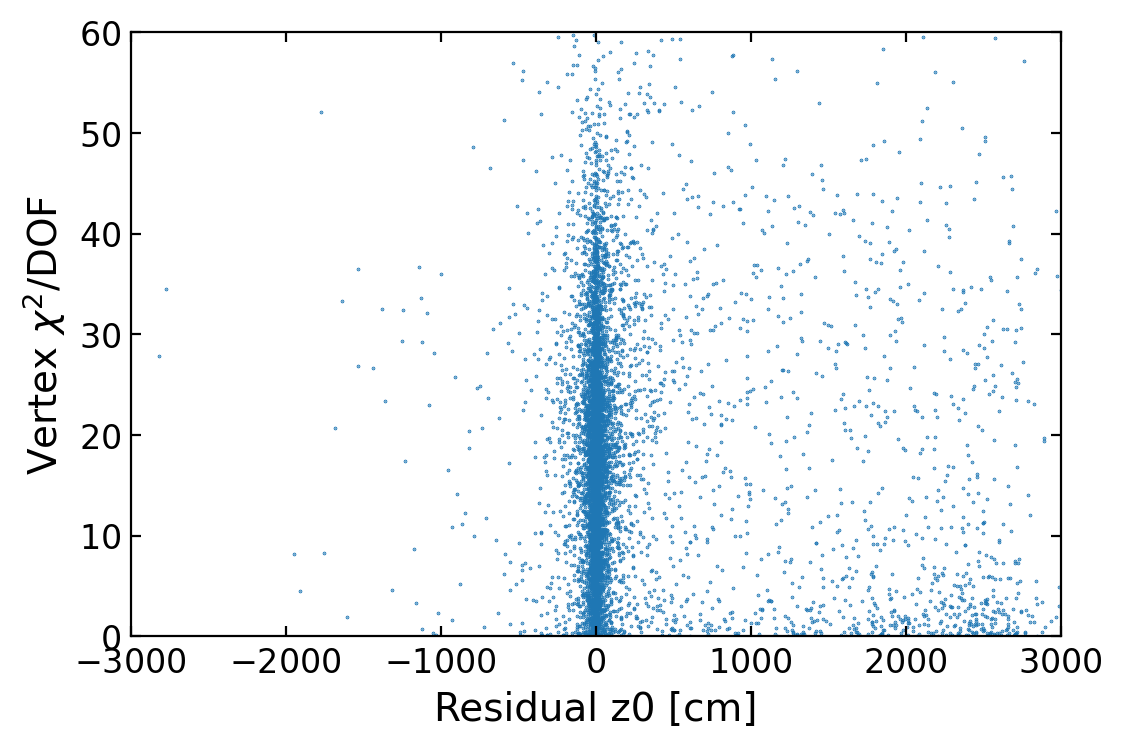

In [25]:
# Figure 3

n,ibins,p = hist(Vertices_rank1_chi2,range=(0,100),label="Data");
bincenters = util.Utils.center(ibins)
# y = scipy.stats.chi2.pdf(bincenters,dof)
# plot(bincenters/dof,y/sum(y[:1])*sum(n[:1]),label=r"$\chi^2_{k=2}$")
yscale("log")
xlabel("Vertex $\chi^2$/dof")
print("Mean chi2/dof:",np.mean(Vertices_rank1_chi2))
legend()
ylim(1,)
savefig(f"{filelables[ifile]}_chi2_{fig_idx}")
show()

# hist(Vertex_track_purity);
# show()

hist2d(Vertex_rank1_track_purity,Vertices_rank1_chi2,bins=(100,100),range=((0,1),(0,60)),norm=LogNorm());
colorbar()
xlabel("Average track purity")
ylabel("Vertex $\chi^2$/dof")
savefig(f"{filelables[ifile]}_chi2_vs_purity_{fig_idx}")
show()



# Figure 4
scatter(residual_rank1[:,1], Vertices_rank1_chi2,s=0.1);
xlabel("Residual z0 [cm]")
ylabel("Vertex $\chi^2$/DOF")
xlim(-3000,3000)
ylim(0,60)
show()